<a href="https://colab.research.google.com/github/palash-21/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
#The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. 
#In this problem, we do not have to predict the actual price but a price range indicating how high the price is..




As the smartphones industry gets more and more competitive each day, finding the best pricing range for a smartphone would be a key strategy to have a profitable smartphone company.

However, as there are hugh type of smartphones, it's getting tougher for a company to justify price range of a phone.

In this exercise we will uncover most important specifications of mobile that affect price and will eventually attempt to classify mobiles into 4 price ranges - low,medium,high,very high.

#  Data Description :

Battery_power - Total energy a battery can store in one time measured in mAh        

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are on a call

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

#1 Data loading and pre-processing

In [ ]:
# Lets Equip all the tools we would need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore") 
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import train_test_split,GridSearchCV
from yellowbrick.target import ClassBalance
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,auc,f1_score,classification_report,hamming_loss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_mob_data_csv = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Mobile Price Range Classification/data_mobile_price_range.csv"
mob_df = pd.read_csv(path_mob_data_csv)

In [ ]:
# To display all columns
pd.set_option('display.max_columns', None)

In [ ]:
# Taking a glance on the datasets
print("no of observations & no of features", mob_df.shape)
mob_df.head()

no of observations & no of features (2000, 21)


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [ ]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Great!!! We dont have any nulls and the date type also looks correct

In [ ]:
mob_df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

*   This dataset seems older as the specifications of mobiles are not from recent technologies like max 2000mah battery, 4gb ram,etc. 
*   There are some zeroes in the dataset. 

In [ ]:
# Front and primary camera may have zero indicating no camera 
# but its highly unlikely to have only front camera and no primary camera, lets check
mob_df[mob_df['pc']==0]['fc'].value_counts()

0    101
Name: fc, dtype: int64

This looks okay!!

In [ ]:
#  Pixel resolution height 
print(mob_df[mob_df['px_height']==0])
indexes = list(mob_df[mob_df['px_height']==0].index)
print('indexes:',indexes)
print('Skewness:', mob_df['px_height'].skew())

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  11          0      1987  3692    13     0   
1933    0.6        154        8  10          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  
indexes: [1481, 1933]
Skewness: 0.6662712560691598


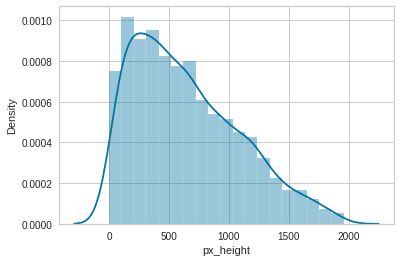

In [ ]:
#Distribution of pixel height
sns.distplot(mob_df['px_height'])

In [ ]:
# We have two zero entries for pixel height, 
# Also there are entries with very low pixel height
# First we will replace both of these zeros with median
for index in indexes:
  mob_df.loc[index,'px_height']=int(mob_df['px_height'].median())
print(int(mob_df['px_height'].median()))

564


In [ ]:
#  Screen width 
print(mob_df[mob_df['sc_w']==0])
indexes = list(mob_df[mob_df['sc_w']==0].index)
print('indexes:',indexes)
print('Skewness:', mob_df['sc_w'].skew())

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
12             1815     0          2.8         0   2       0          33   
24              503     0          1.2         1   5       1           8   
33             1310     1          2.2         1   0       1          51   
42             1253     1          0.5         1   5       1           5   
50             1547     1          3.0         1   2       1          14   
...             ...   ...          ...       ...  ..     ...         ...   
1918            772     0          1.0         1   0       1          23   
1920            591     1          0.5         1   1       1          16   
1946            590     1          1.2         1   0       0          32   
1954            686     1          2.7         1   0       0          36   
1981           1454     0          2.6         0   8       0           6   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
12      0

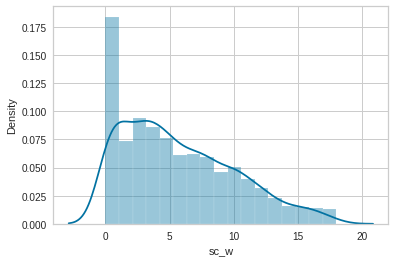

In [ ]:
#Distribution of screen width
sns.distplot(mob_df['sc_w'])

In [ ]:
# We have 180 entries for zeroes i.e 9% 
# We will group by the price range and replace the 0 value of sc_width
# with the averaege of sc_width based on price_range
# Checking avg screen width vs price range
mob_df.groupby('price_range')['sc_w'].mean().astype(int)

price_range
0    5
1    5
2    5
3    6
Name: sc_w, dtype: int64

In [ ]:
# Replacing these zeros with avg width based on price range
mob_df['sc_w'] = mob_df['sc_w'].replace(0, np.nan)
mob_df['sc_w'] = mob_df['sc_w'].fillna(mob_df.groupby('price_range')['sc_w'].transform('mean').astype(int))
mob_df['sc_w'] = mob_df['sc_w'].astype(int)
mob_df[mob_df['sc_w']==0]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

In [ ]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

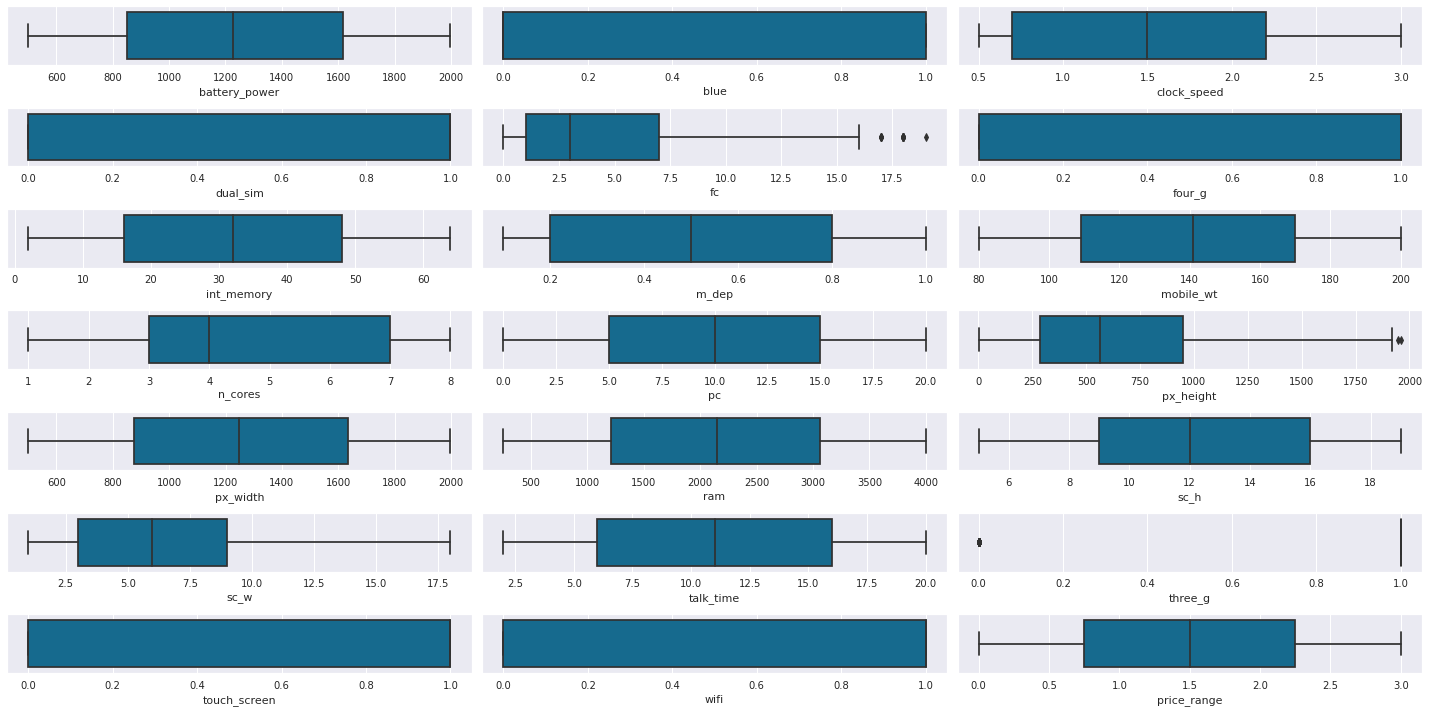

In [ ]:
## box plot 

plt.figure(figsize = (20, 10))
x = 1 

for column in mob_df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(mob_df[column])
    x+= 1

plt.tight_layout()

*   There are some outliers in fc(front camera)
*   Pixel height has lots of abnormally small values

In [ ]:
# Low values of pixel height

mob_df[mob_df['px_height']<200].describe()


battery_power        blue  clock_speed    dual_sim          fc  \
count     345.000000  345.000000   345.000000  345.000000  345.000000   
mean     1229.362319    0.498551     1.529855    0.515942    4.414493   
std       423.061220    0.500724     0.814731    0.500472    4.339424   
min       507.000000    0.000000     0.500000    0.000000    0.000000   
25%       880.000000    0.000000     0.700000    0.000000    1.000000   
50%      1211.000000    0.000000     1.500000    1.000000    3.000000   
75%      1584.000000    1.000000     2.200000    1.000000    7.000000   
max      1998.000000    1.000000     3.000000    1.000000   18.000000   

           four_g  int_memory       m_dep   mobile_wt     n_cores          pc  \
count  345.000000  345.000000  345.000000  345.000000  345.000000  345.000000   
mean     0.550725   33.127536    0.486957  139.368116    4.400000    9.863768   
std      0.498143   18.824958    0.295269   35.276575    2.312001    6.097225   
min      0.000000    2.000000    0.100000   80.000000    1.000000    0.000000   
25%      0.000000   16.000000    0.200000  109.000000    2.000000    4.000000   
50%      1.000000   33.000000    0.500000  138.000000    4.000000   10.000000   
75%      1.000000   50.000000    0.700000  171.000000    6.000000   15.000000   
max      1.000000   64.000000    1.000000  200.000000    8.000000   20.000000   

        px_height    px_width          ram        sc_h        sc_w  \
count  345.000000   345.00000   345.000000  345.000000  345.000000   
mean   109.765217  1084.97971  2179.800000   12.069565    6.124638   
std     56.505196   424.38329  1100.041663    4.065714    3.823748   
min      1.000000   501.00000   256.000000    5.000000    1.000000   
25%     64.000000   724.00000  1181.000000    9.000000    3.000000   
50%    115.000000  1022.00000  2290.000000   13.000000    6.000000   
75%    160.000000  1409.00000  3153.000000   15.000000    8.000000   
max    199.000000  1998.00000  3991.000000   19.000000   18.000000   

        talk_time     three_g  touch_screen        wifi  price_range  
count  345.000000  345.000000    345.000000  345.000000   345.000000  
mean    11.234783    0.776812      0.486957    0.452174     1.353623  
std      5.282701    0.416988      0.500556    0.498430     1.121743  
min      2.000000    0.000000      0.000000    0.000000     0.000000  
25%      7.000000    1.000000      0.000000    0.000000     0.000000  
50%     12.000000    1.000000      0.000000    0.000000     1.000000  
75%     16.000000    1.000000      1.000000    1.000000     2.000000  
max     20.000000    1.000000      1.000000    1.000000     3.000000

Even for high end mobiles in the dataset, pixel height is low.
This is very abnormal
Lets do some quick resolution study


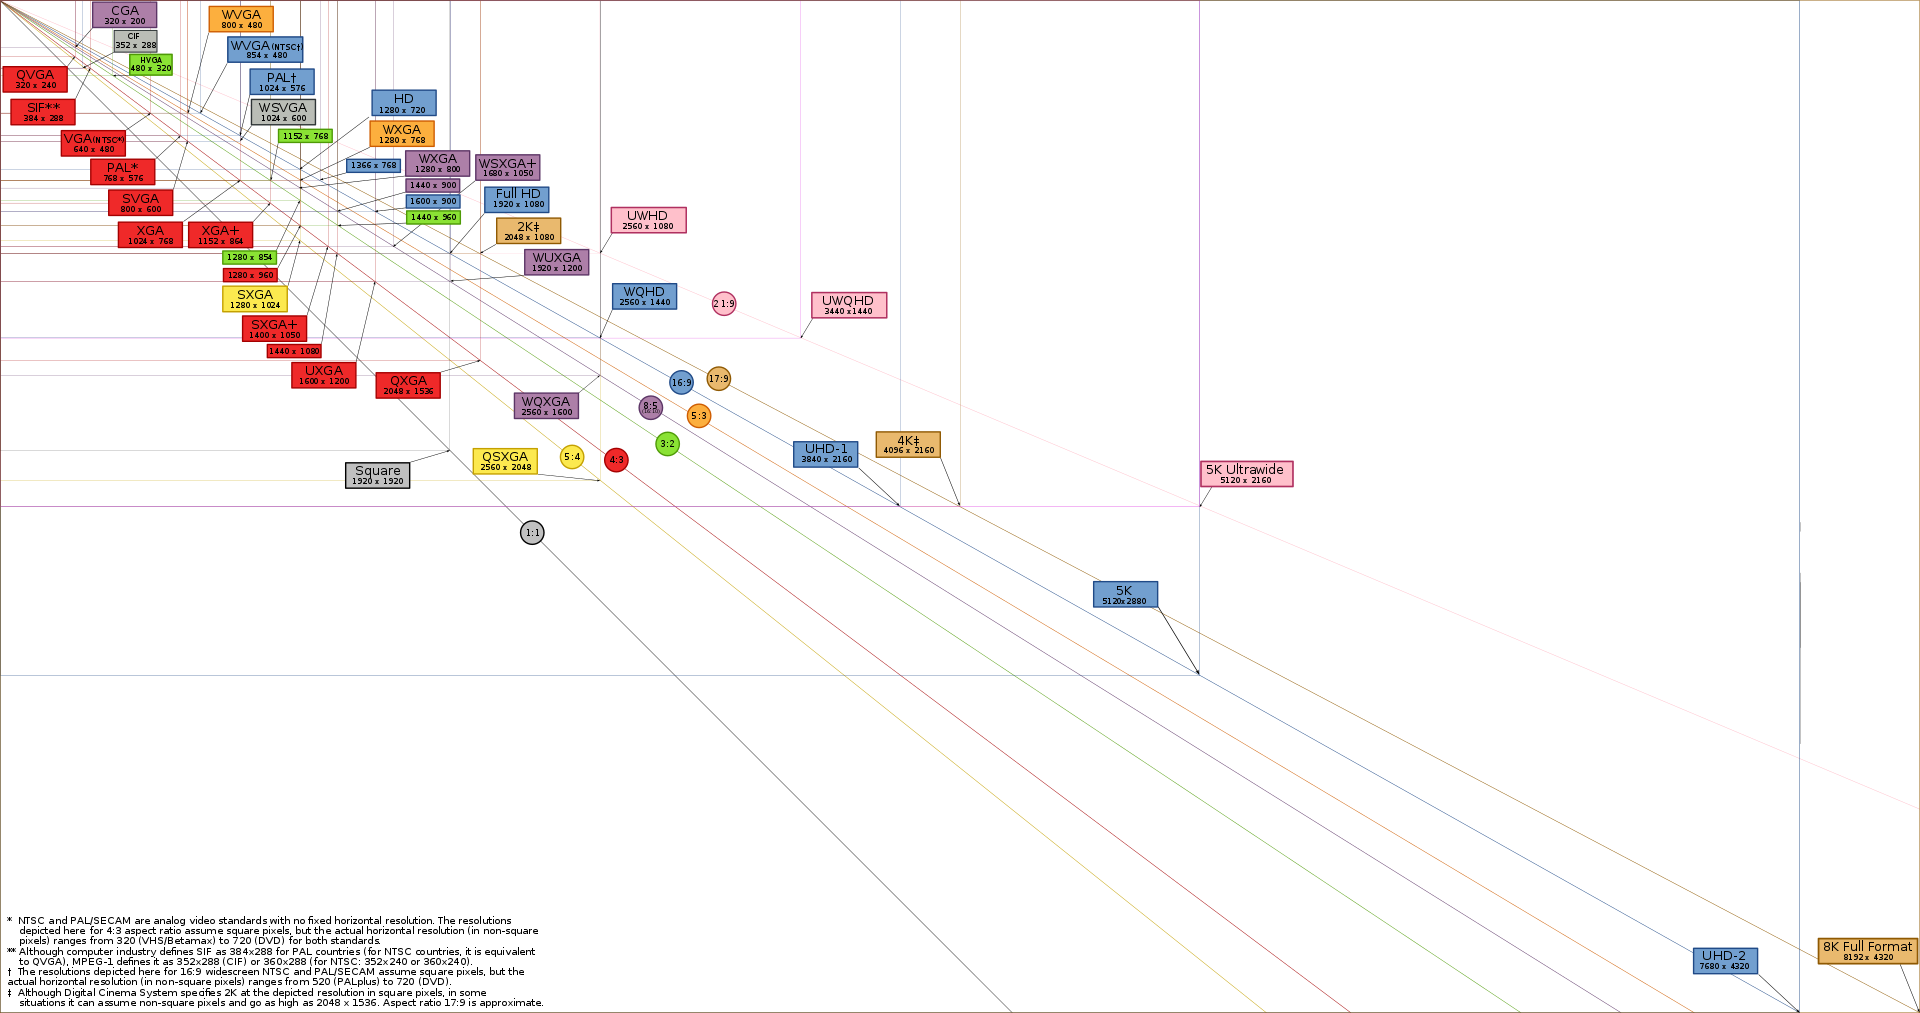

In [ ]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Mobile Price Range Classification/1920px-Vector_Video_Standards.jpg", width = 1400, height = 1000)

In [ ]:
# We have taken this image from wikipedia page https://en.wikipedia.org/wiki/Ultrawide_formats
# Replacing all pixel heights less than 200 with average based on price range
mob_df.loc[mob_df['px_height']<200, 'px_height'] = np.nan
mob_df['px_height'] = mob_df['px_height'].fillna(mob_df.groupby('price_range')['px_height'].transform('mean').astype(int))
mob_df['px_height'] = mob_df['px_height'].astype(int)

In [ ]:
mob_df['ram'].value_counts()

1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64

In [ ]:
mob_df['int_memory'].value_counts()

27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

RAM generally comes in multiples of 256Mb like 256mb,512mb,1gb,2gb,etc
Similarly, Internal memory also comes in sizes like 1,2,4,8,16,32,64 of GB
But here there are abnormal values for RAM & internal Memory

In [ ]:
mob_df['clock_speed'].value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

In [ ]:
# Generally mobile display is measured in diagonal length in inches
# Using screen height and width to get this size

# Diagonal length = sqrt(height**2 + width**2)
# As height & width mentiones are in cm, we will convert them into inch by div with 2.54
mob_df['sc_size'] = np.round(np.sqrt(np.power(mob_df['sc_h'],2) + np.power(mob_df['sc_w'],2))/2.54,1)
mob_df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2        769       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  sc_size  
0        0             0     1            1      4.5  
1        1             1     0            2      6.8  
2        1             1     0            2      4.4  
3        1             0     0            2      7.0  
4        1             1     0            1      3.2

In [ ]:
# As we saw earlier we have different resolution definations
# We will group our mobiles based on resolutions into 3 categories : CGA,VGA,HD
# We will nominate 1: CGA, 2:VGA and 3:HD

mob_df.loc[(mob_df['px_width'] >= 1080) | (mob_df['px_height'] >= 720), 'resolution'] = 3
mob_df.loc[((mob_df['px_width'] < 1080) & (mob_df['px_width'] >= 640)) | ((mob_df['px_height'] < 720) & (mob_df['px_height'] >= 480)), 'resolution'] = 2
mob_df.loc[(mob_df['px_width'] < 640) | (mob_df['px_height'] < 480), 'resolution'] = 1
mob_df['resolution'] = mob_df['resolution'].astype(int)
mob_df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2        769       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  sc_size  resolution  
0        0             0     1            1      4.5           2  
1        1             1     0            2      6.8           3  
2        1             1     0            2      4.4           3  
3        1             0     0            2      7.0           3  
4        1             1     0            1      3.2           3

In [ ]:
mob_df['resolution'].value_counts()

3    778
2    621
1    601
Name: resolution, dtype: int64

In [ ]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#2 EDA

In [ ]:
mob_df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   754.897000  1251.515500  2124.213000    12.306500   
std       6.064315   370.069322   432.199447  1084.732044     4.213245   
min       0.000000   201.000000   500.000000   256.000000     5.000000   
25%       5.000000   470.750000   874.750000  1207.500000     9.000000   
50%      10.000000   716.500000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      6.307000    11.011000     0.761500      0.503000     0.507000   
std       3.961893     5.463955     0.426273      0.500116     0.500076   
min       1.000000     2.000000     0.000000      0.000000     0.000000   
25%       3.000000     6.000000     1.000000      0.000000     0.000000   
50%       6.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range      sc_size   resolution  
count  2000.000000  2000.000000  2000.000000  
mean      1.500000     5.563450     2.088500  
std       1.118314     1.965879     0.825838  
min       0.000000     2.000000     1.000000  
25%       0.750000     3.900000     1.000000  
50%       1.500000     5.600000     2.000000  
75%       2.250000     7.100000     3.000000  
max       3.000000    10.300000     3.000000

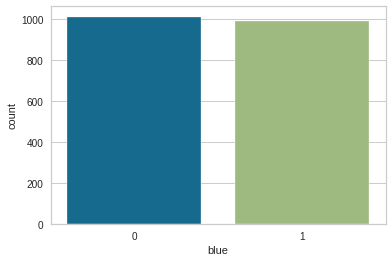

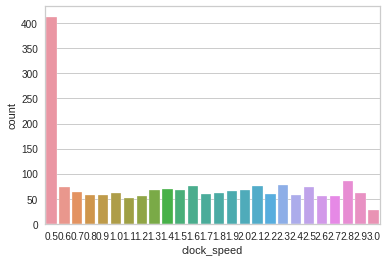

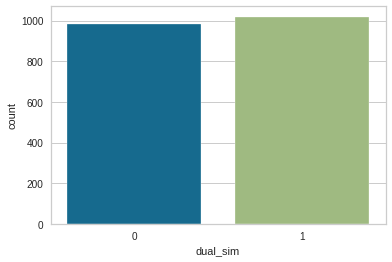

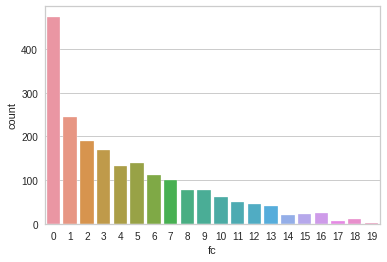

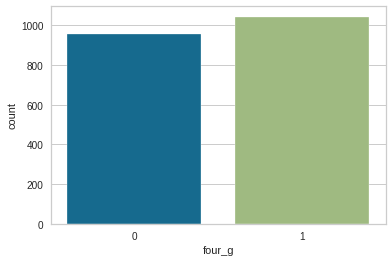

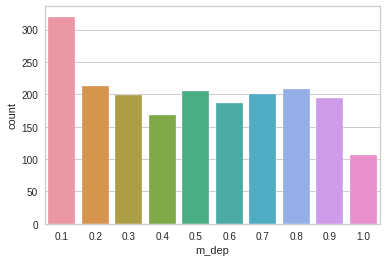

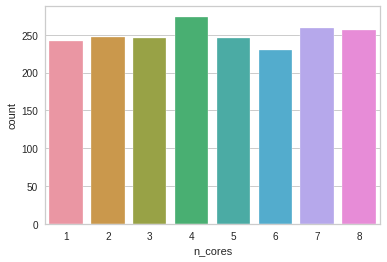

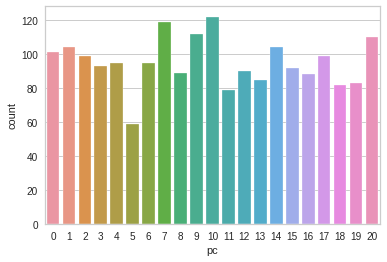

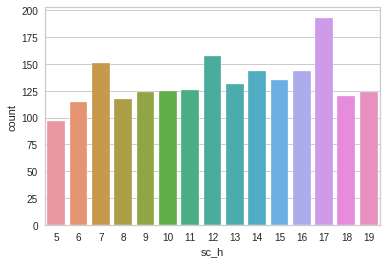

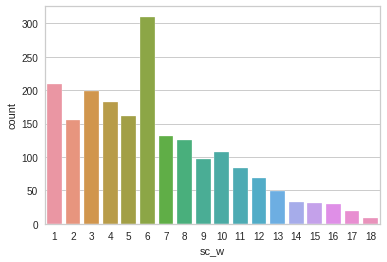

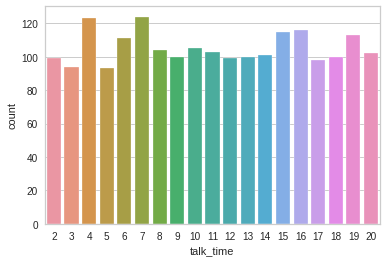

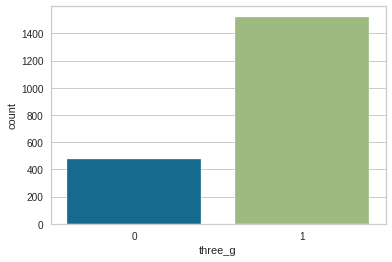

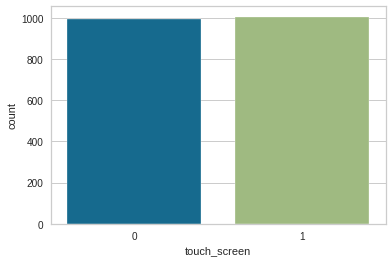

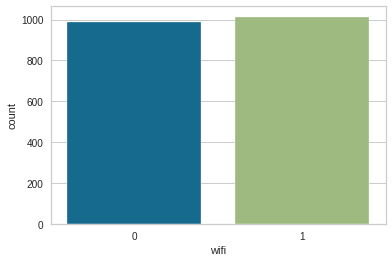

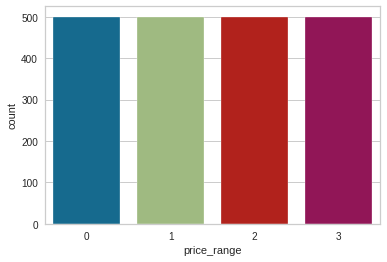

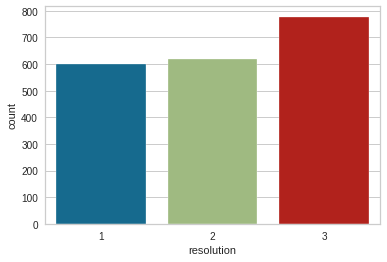

In [ ]:
#CountPlot for various columns
for i in mob_df:
    if(mob_df[i].nunique()<30):
        sns.countplot(x=mob_df[i])
        plt.show()

*   The mobile are equally categorized between all 4 price range.
*   Almost half of the mobiles in our dataset have bluetooth, dual sim, 4G, touch screen, wifi
*   Processors range from single core(1) to octa core(8).
*   Processor speed ranges from 0.5 to 3 GHz
*   Majority of mobiles(~75%) have 3G connectivity.
*   Mobile weight is upto 200g.

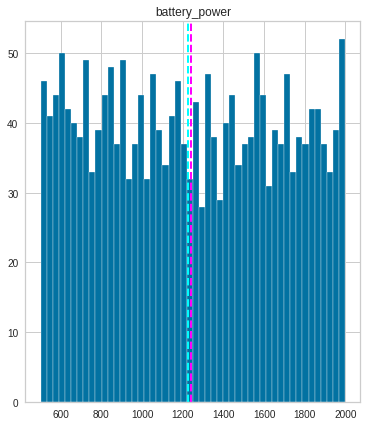

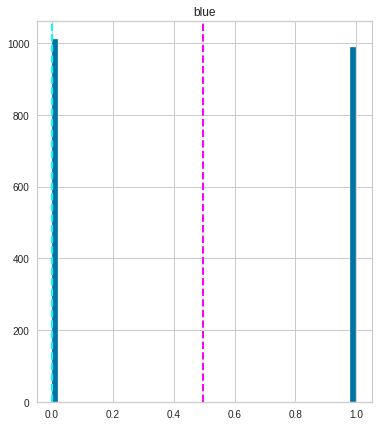

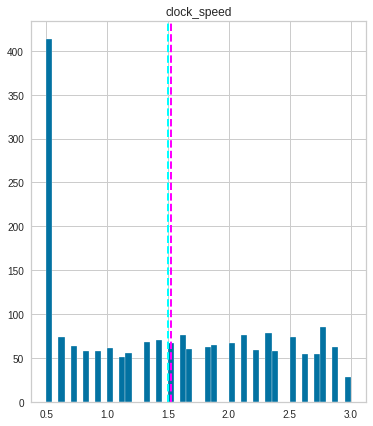

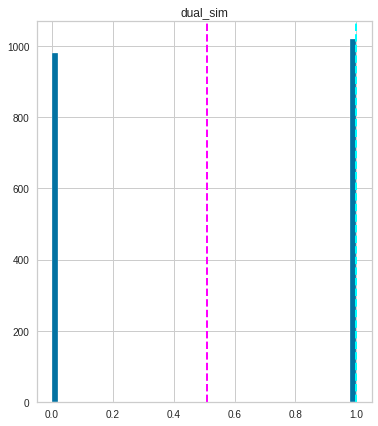

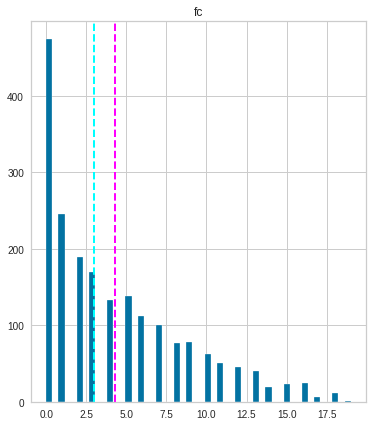

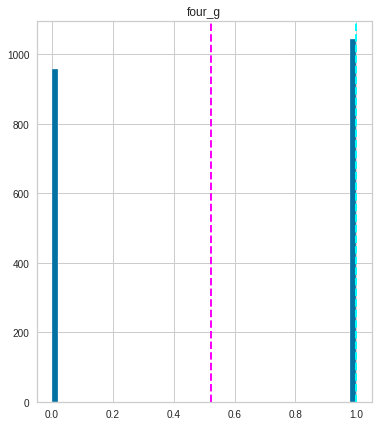

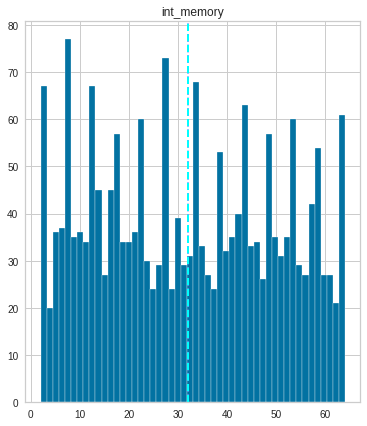

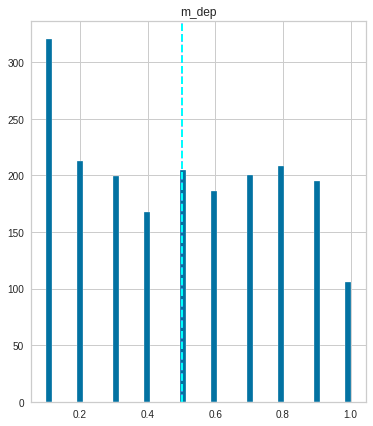

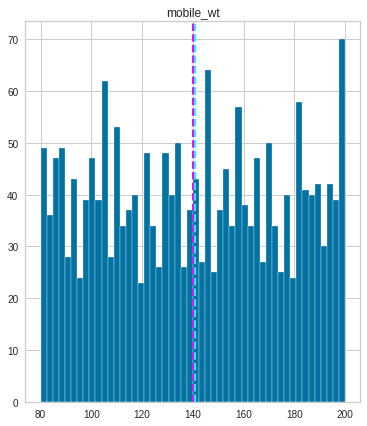

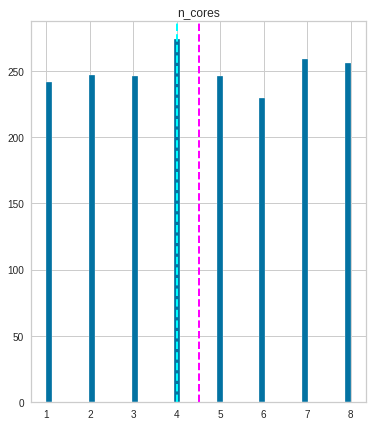

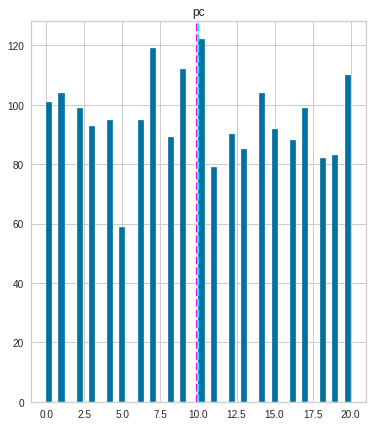

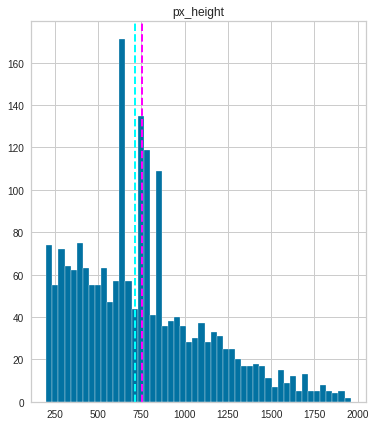

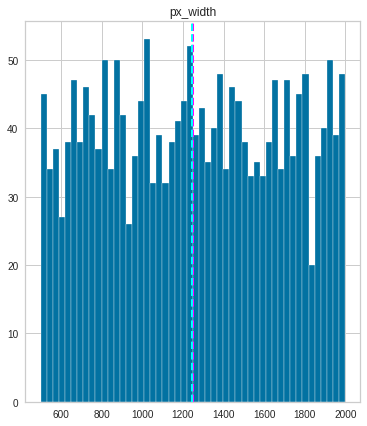

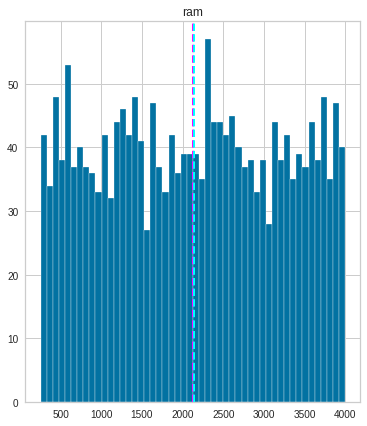

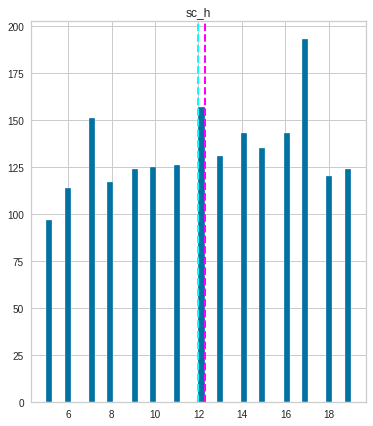

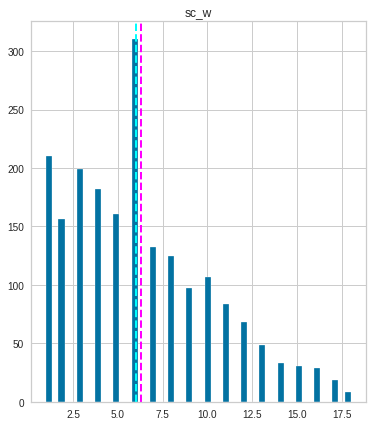

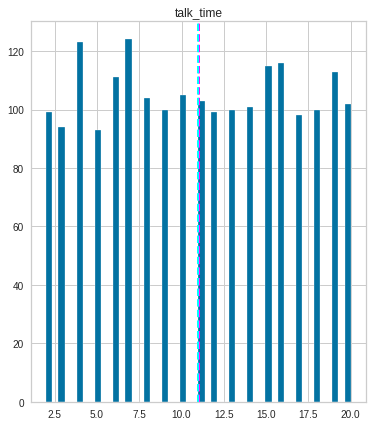

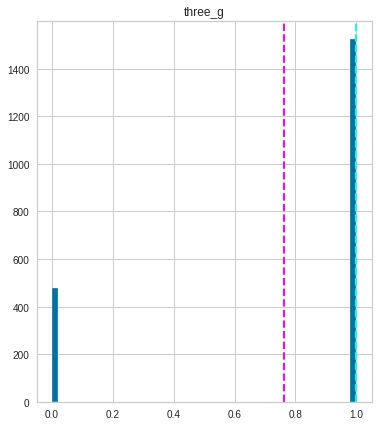

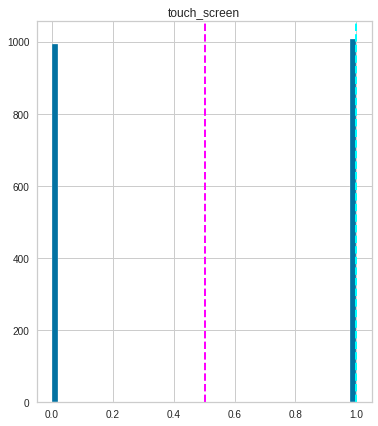

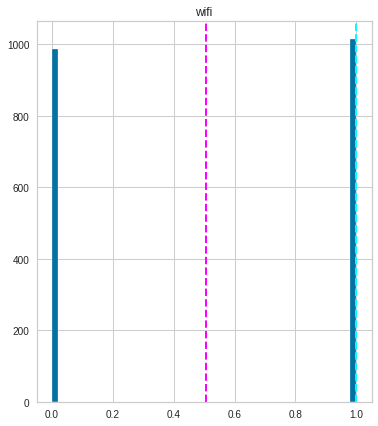

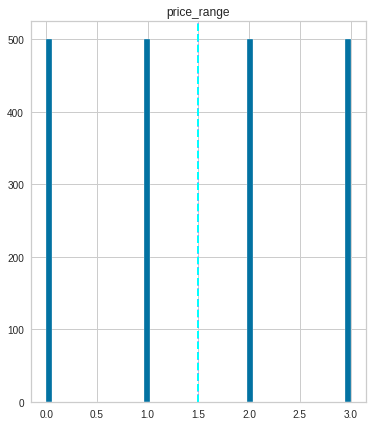

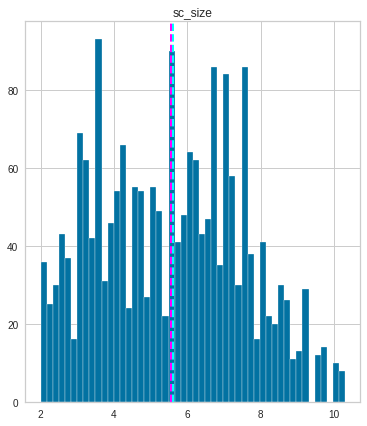

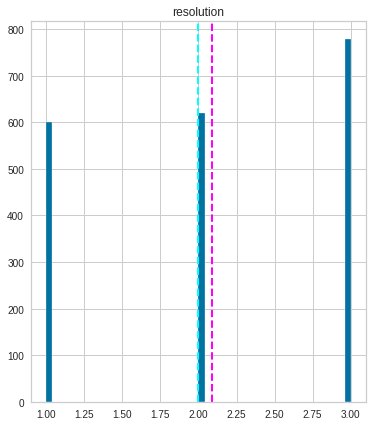

In [ ]:
#Distplot for various columns
for col in mob_df.columns:
  figure=plt.figure(figsize=(6,7))
  ax=figure.gca()
  feature = mob_df[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Text(0.5, 1.0, 'Correlation ')

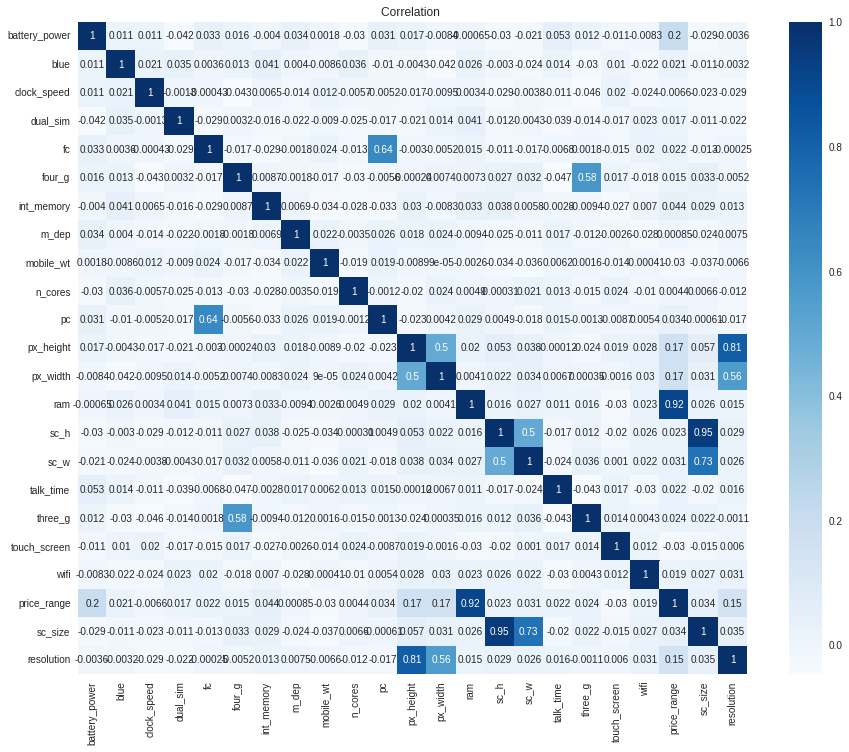

In [ ]:
# Correlation heatmap
corr=mob_df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Blues',annot=True)
r.set_title("Correlation ")

Our target variable Price Range has the highest correlation with RAM. So higher the ram, higher the price of mobile

Some other imp features are battery power,resolution.

Also, some features have high correlation with each other namely
1. front camera and primary camera
2. pixel height and width
3. screen height and width
4. 3G and 4G

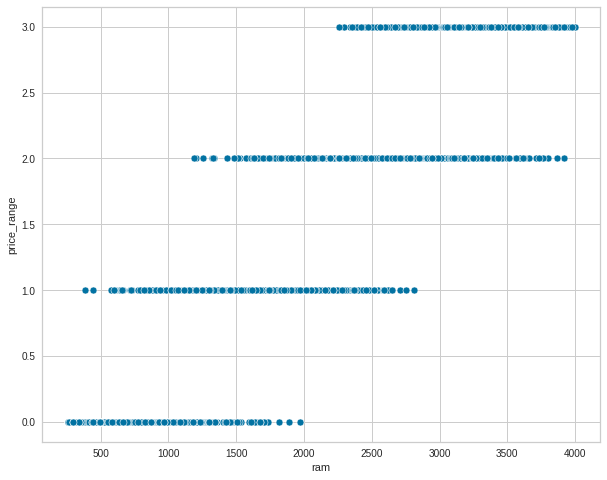

In [ ]:
# Check the range of RAM for the four price ranges
plt.figure(figsize=(10,8))
sns.scatterplot(mob_df['ram'],mob_df['price_range'])

From above plot we can say that

1. Mobiles with RAM upto 2GB falls into low price category
2. Mobiles with RAM from 0.5GB to 3GB falls into medium price category
3. Mobiles with RAM from 1GB to 4GB falls into high price category
4. Mobiles with RAM above 2GB falls into very high price category

Also, there is one interesting observation that RAM of 2GB can be a border line to separate low and very high price tags **directly** irrespective of other mobile specifications



Text(0.5, 1.0, 'RAM distribution of price range 3')

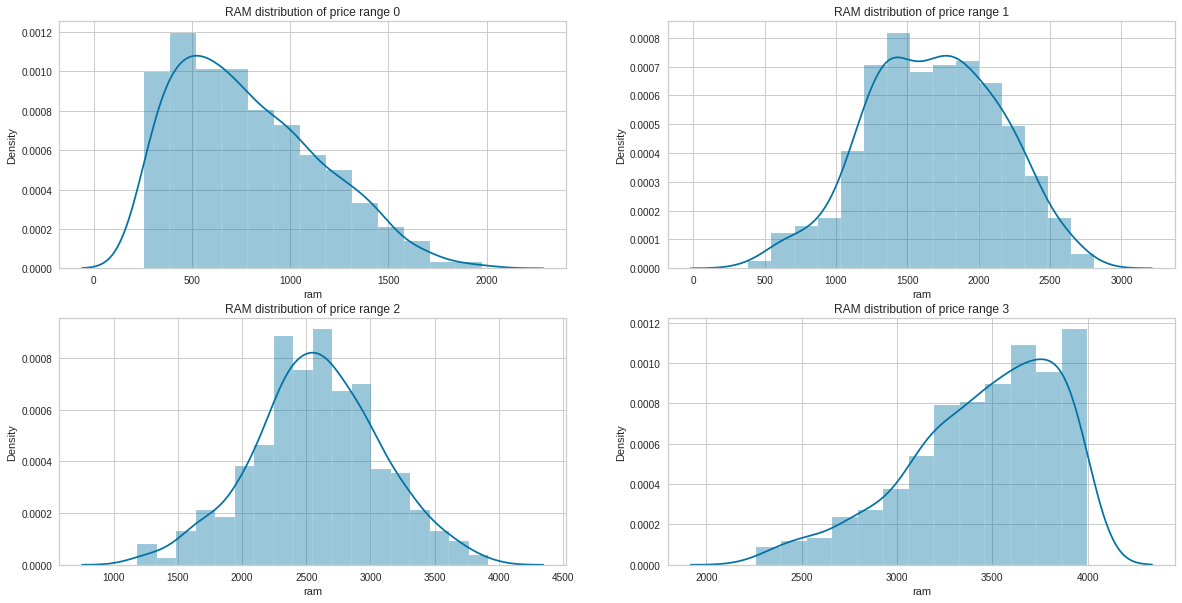

In [ ]:
# Lets check distribution of RAM for each price range seperately

plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(mob_df[mob_df['price_range']==0]['ram'])
plt.title('RAM distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(mob_df[mob_df['price_range']==1]['ram'])
plt.title('RAM distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(mob_df[mob_df['price_range']==2]['ram'])
plt.title('RAM distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(mob_df[mob_df['price_range']==3]['ram'])
plt.title('RAM distribution of price range 3')

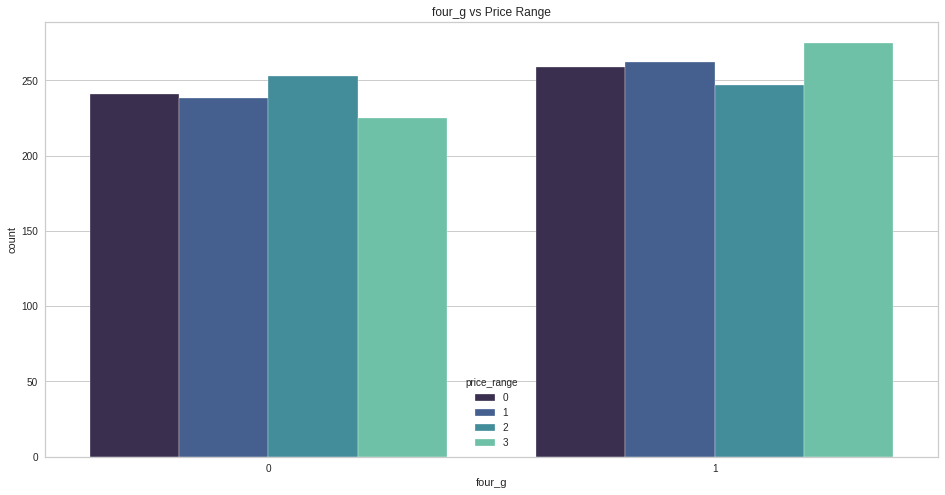

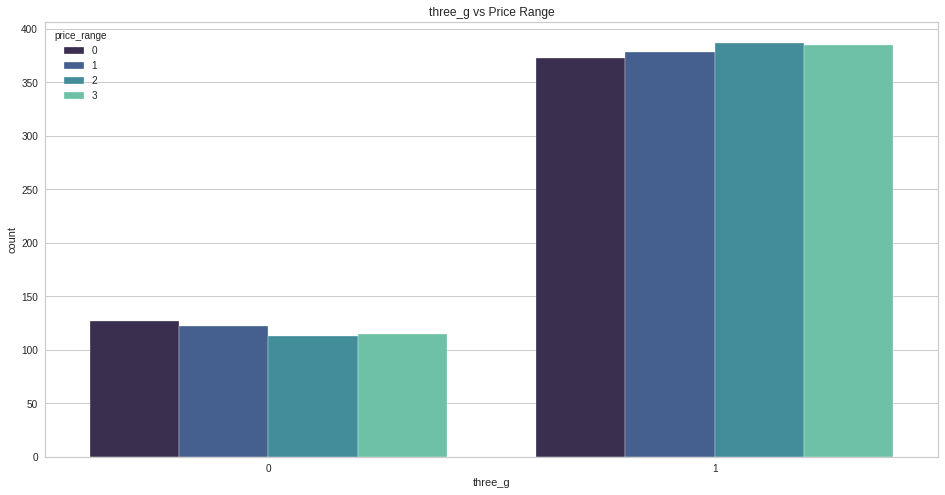

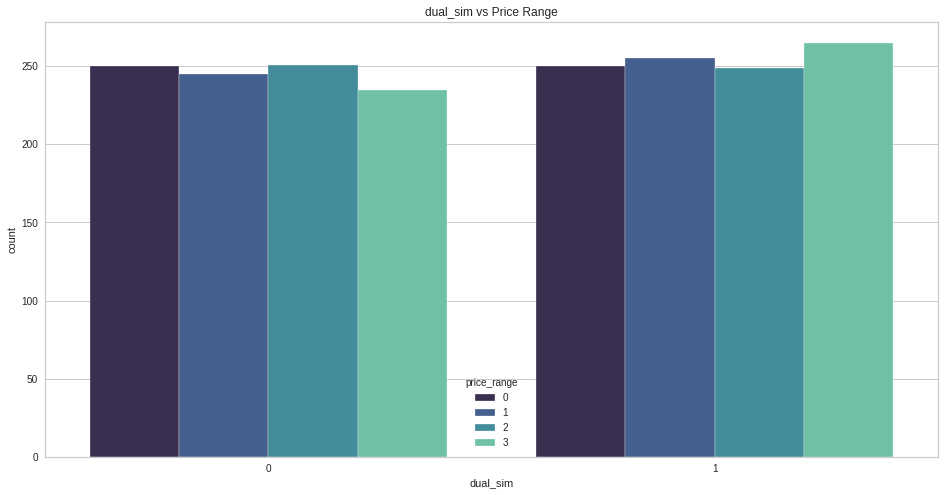

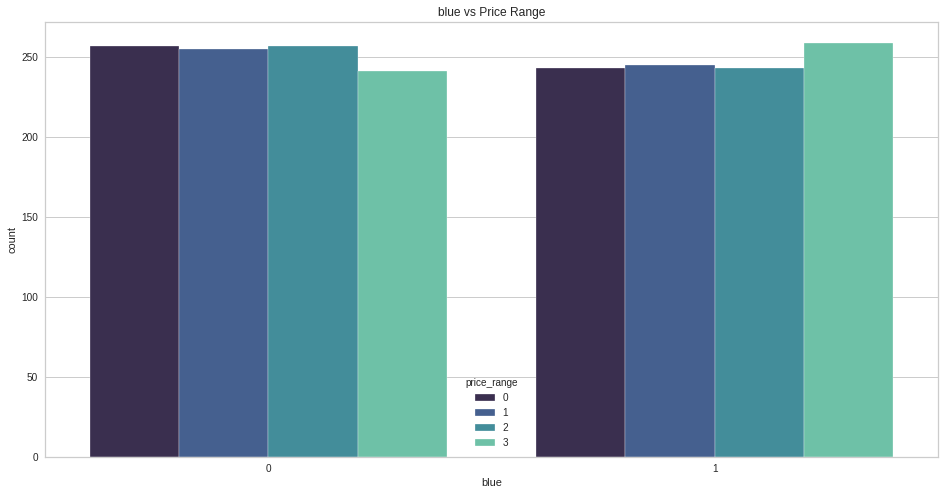

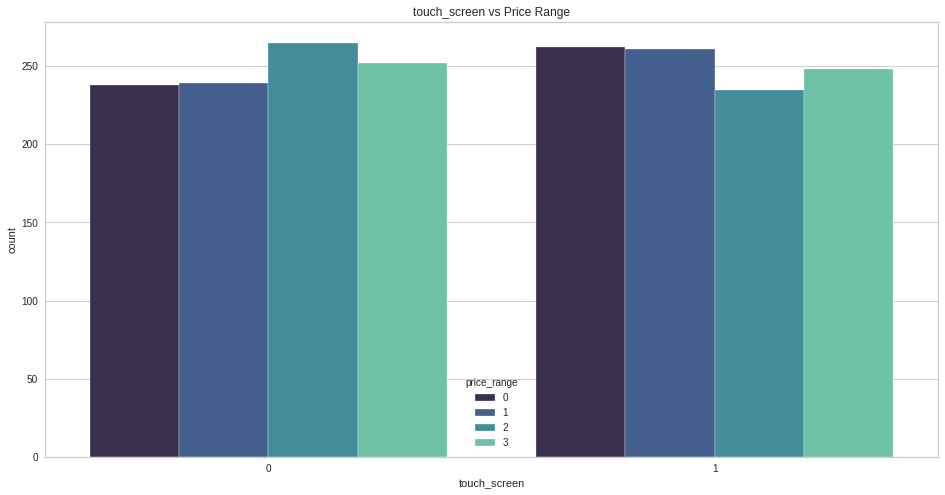

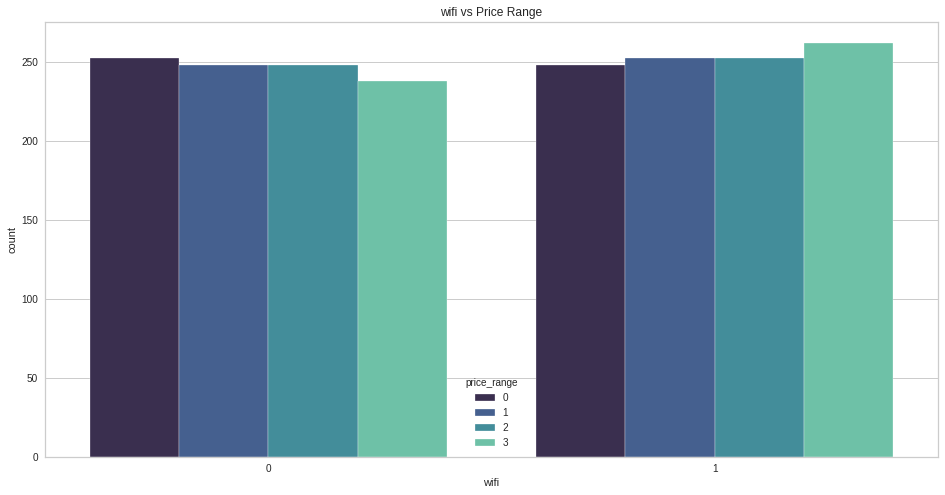

In [ ]:
# Comparing binary features with Price Range

for feature in ['four_g','three_g','dual_sim','blue','touch_screen','wifi']:
  plt.figure(figsize = (16, 8))
  plt.title(f'{feature} vs Price Range')
  sns.countplot(mob_df[feature], palette = 'mako', hue = mob_df['price_range'])

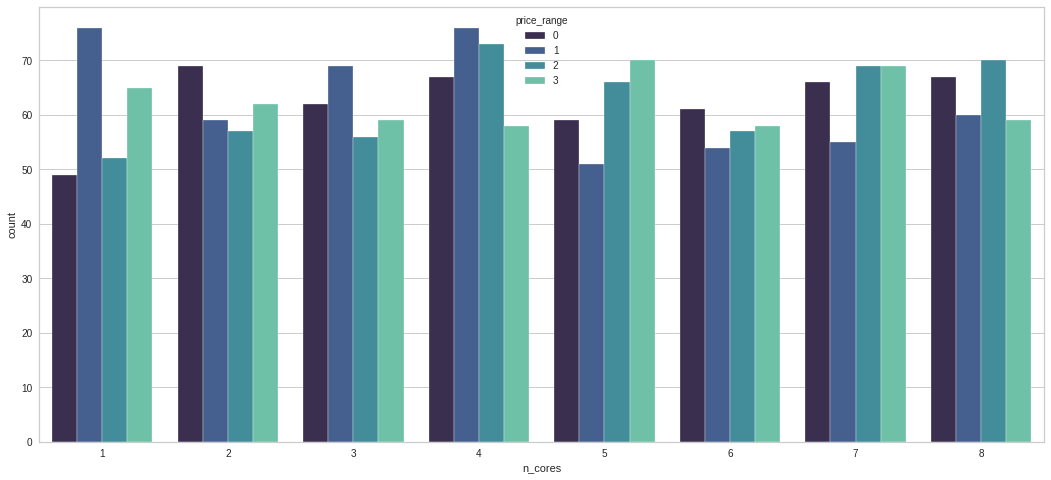

In [ ]:
# No of Cores vs Price Range
plt.figure(figsize = (18, 8))
sns.countplot(mob_df['n_cores'], palette = 'mako', hue = mob_df['price_range'])

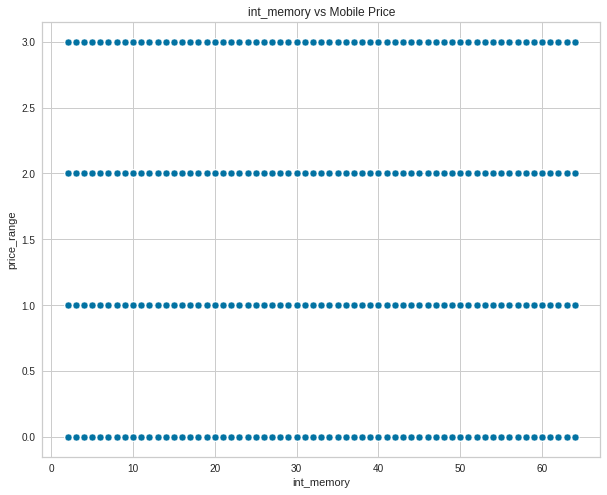

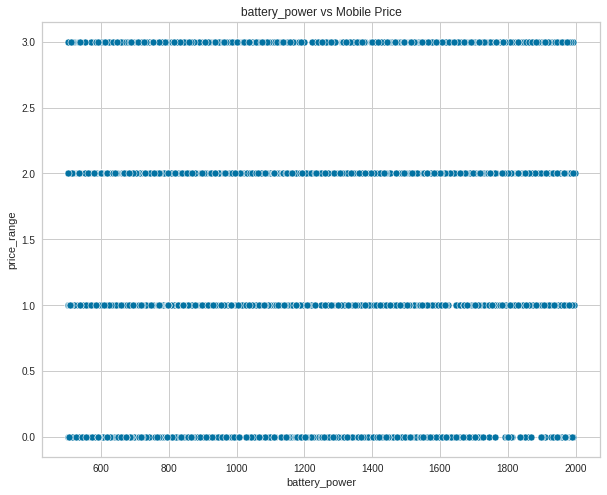

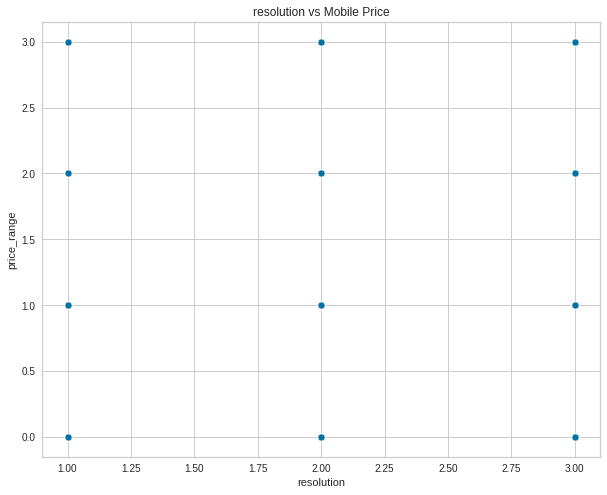

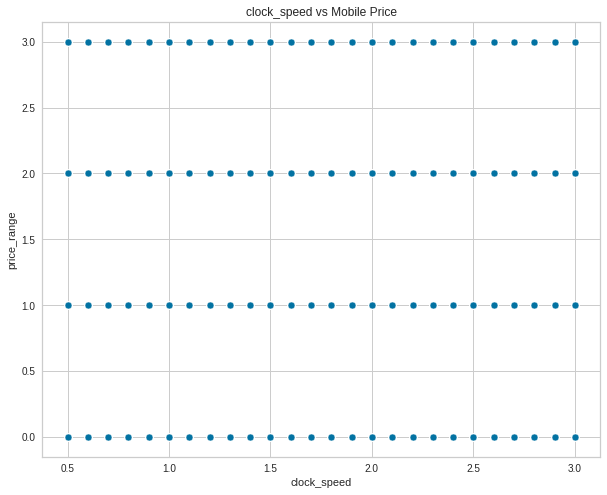

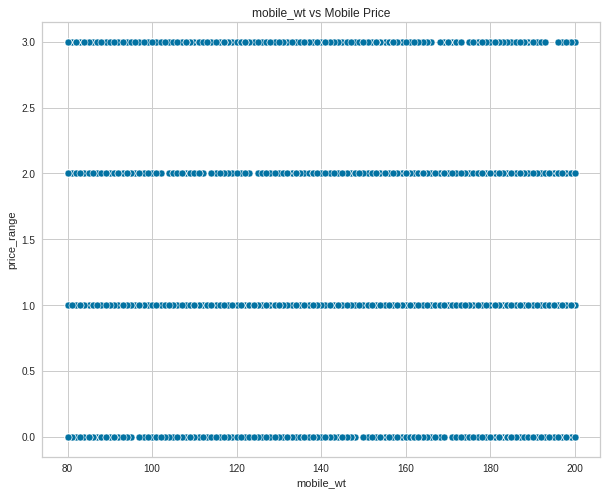

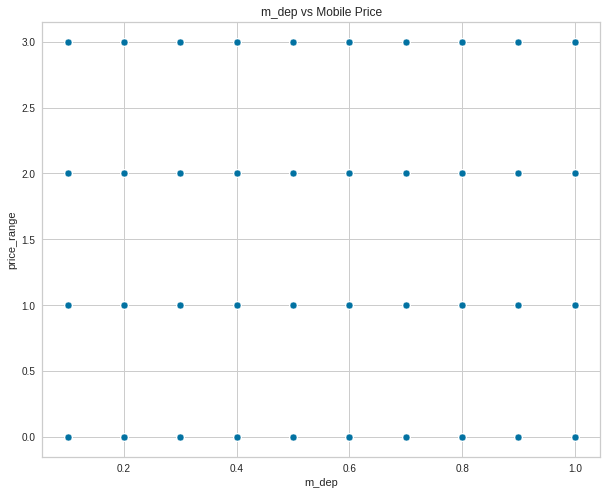

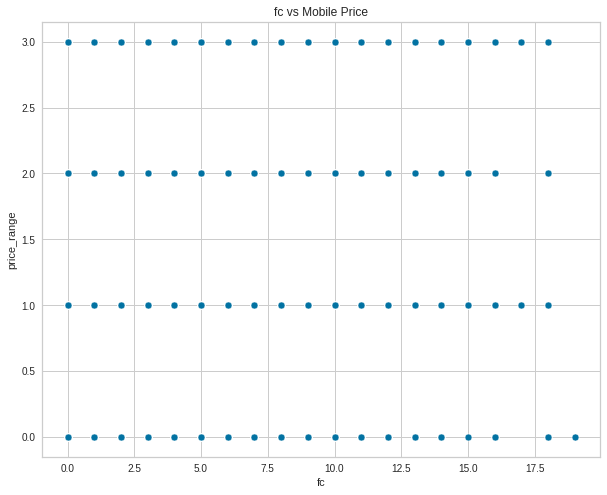

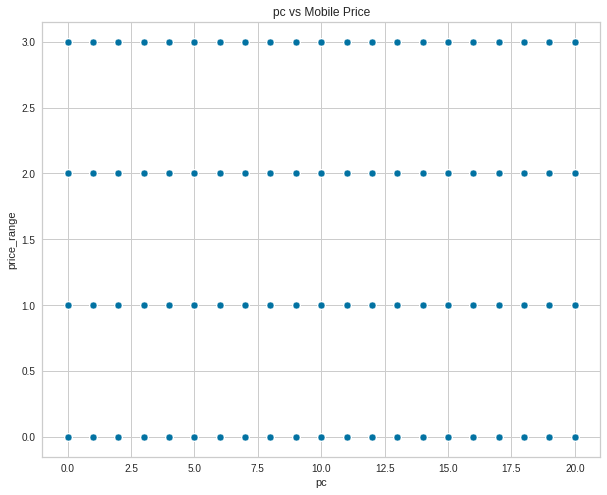

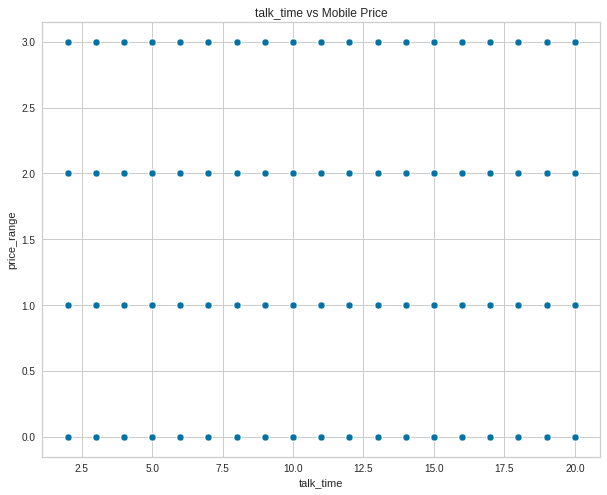

In [ ]:
# Scatter plot of imp features with price range

for feature in ['int_memory','battery_power','resolution','clock_speed','mobile_wt','m_dep','fc','pc','talk_time']:
  plt.figure(figsize=(10,8))
  plt.title(f'{feature} vs Mobile Price')
  sns.scatterplot(mob_df[feature],mob_df['price_range'])


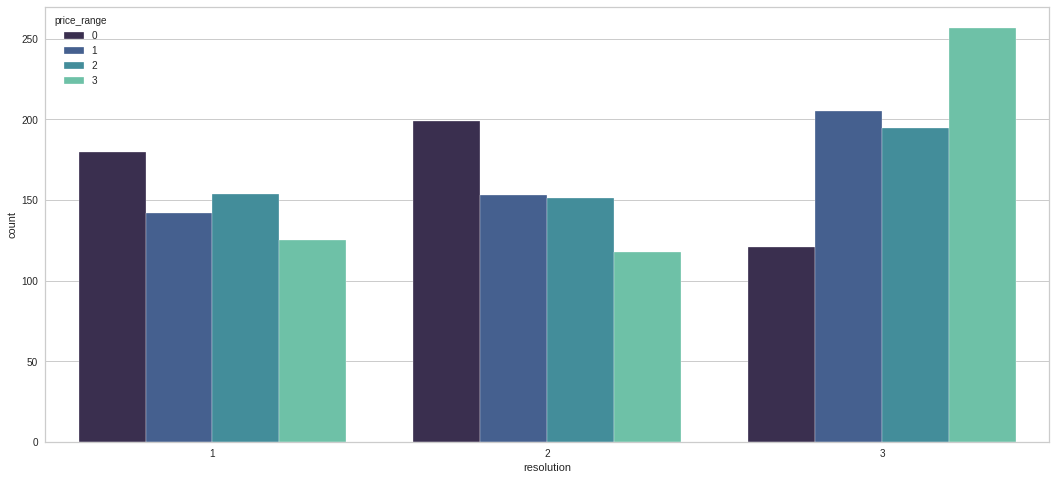

In [ ]:
# Resolution vs Price Range
plt.figure(figsize = (18, 8))
sns.countplot(mob_df['resolution'], palette = 'mako', hue = mob_df['price_range'])

So for higher price ranges, resolution is also high

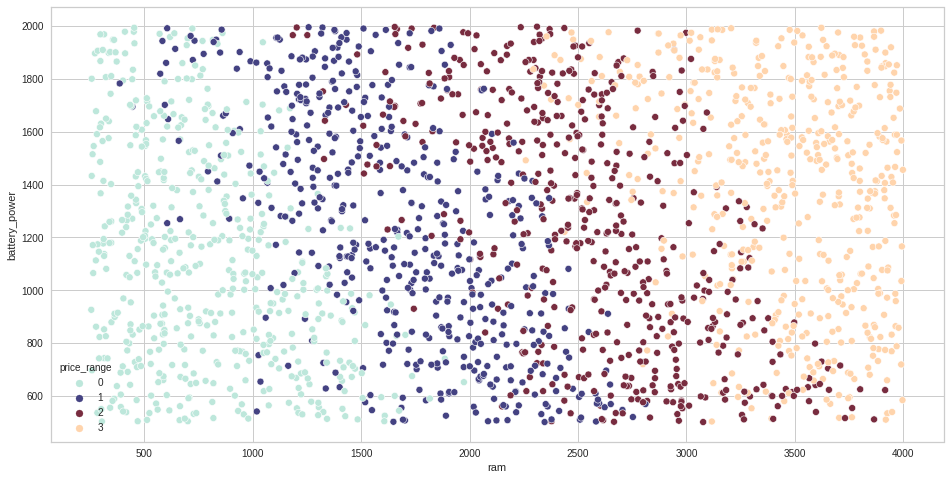

In [ ]:
# Battery power vs Ram

plt.figure(figsize = (16, 8))
sns.scatterplot(mob_df['ram'], mob_df['battery_power'], hue = mob_df['price_range'], palette = 'icefire')

Earlier we saw that RAM is the most imp feature for price range
And here we can see battery power varies with RAM

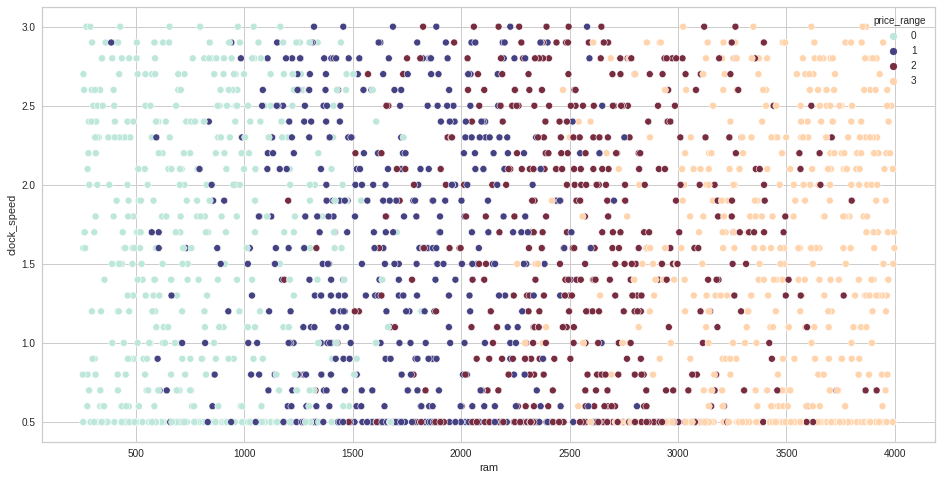

In [ ]:
#clock speed and ram

plt.figure(figsize = (16, 8))
sns.scatterplot(mob_df['ram'], mob_df['clock_speed'], hue = mob_df['price_range'], palette = 'icefire')


We can see that even with small ram it's possible to have up to 3 GHz clock speed

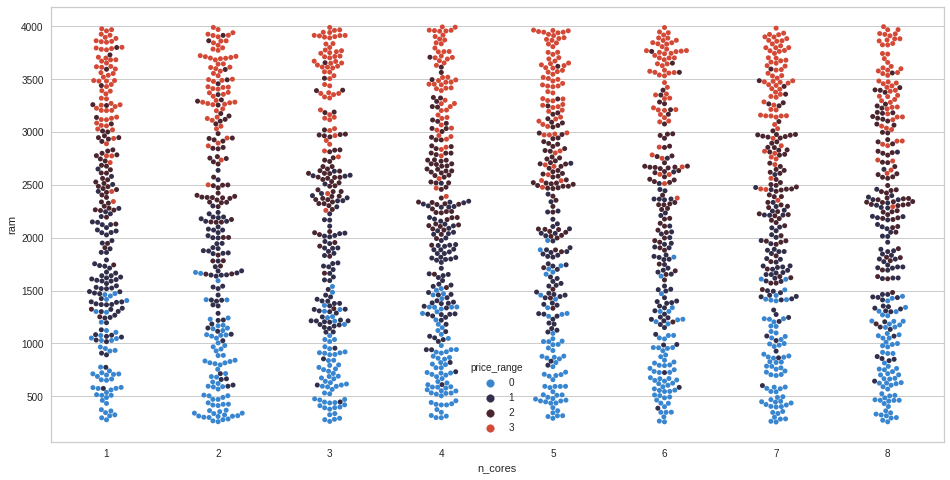

In [ ]:
# number of cores vs ram  

plt.figure(figsize = (16, 8))
sns.swarmplot(mob_df['n_cores'], mob_df['ram'], hue = mob_df['price_range'], palette = 'icefire')

From above plot, we can comment that we can have any number of cores from 1 to 8 for any range of RAM.

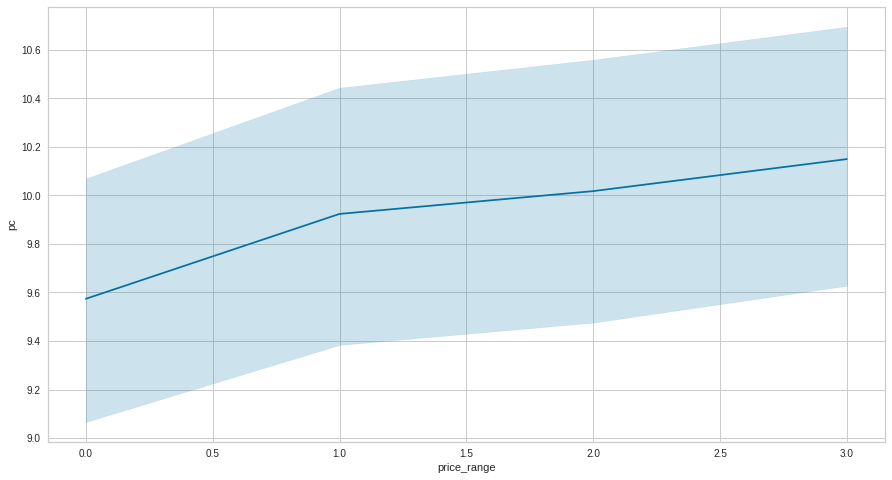

In [ ]:
# Front camera vs price range
plt.figure(figsize = (15, 8))
sns.lineplot(mob_df['price_range'], mob_df['pc'], palette = 'mako')
 

We can see that there's a increase in average primary camera megapixel when the price range increases

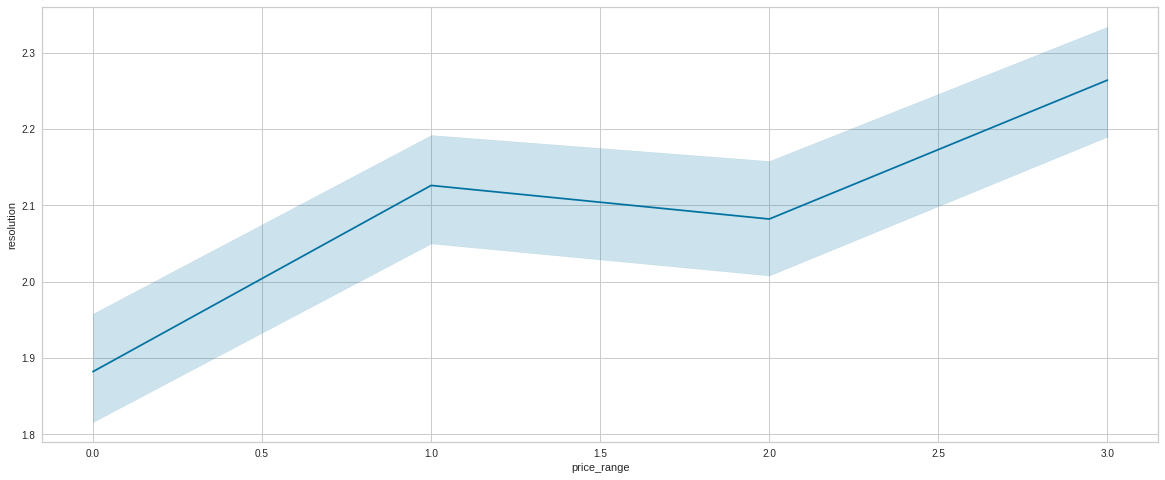

In [ ]:
# Pixel resolution vs price range
plt.figure(figsize = (20, 8))
sns.lineplot(x ='price_range', y ='resolution', data = mob_df)

So, on an average price increases as resolution pixel increase

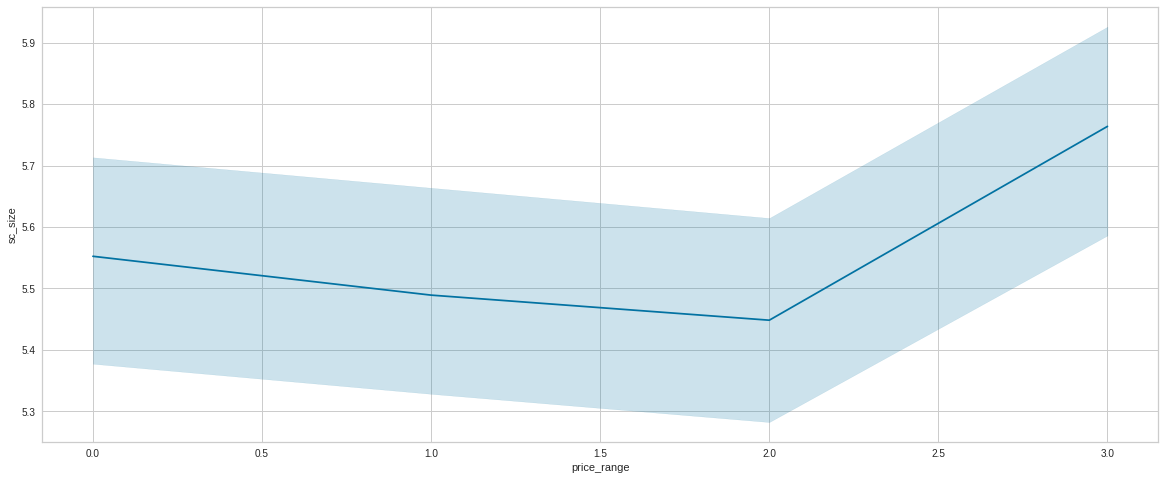

In [ ]:
# Screen size vs price range
plt.figure(figsize = (20, 8))
sns.lineplot(x ='price_range', y ='sc_size', data = mob_df)

#3 Train-test split


In [ ]:
mob_df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2        769       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  sc_size  resolution  
0        0             0     1            1      4.5           2  
1        1             1     0            2      6.8           3  
2        1             1     0            2      4.4           3  
3        1             0     0            2      7.0           3  
4        1             1     0            1      3.2           3

In [ ]:
# Making a copy and removing unwanted features
df_copy = mob_df.copy()
mob_df.drop(columns = ['resolution', 'sc_size'], inplace=True)

In [ ]:
mob_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
X=mob_df.drop(columns=['price_range'])
y=mob_df['price_range']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape,X_test.shape)

(1600, 20) (400, 20)


In [ ]:
std = StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

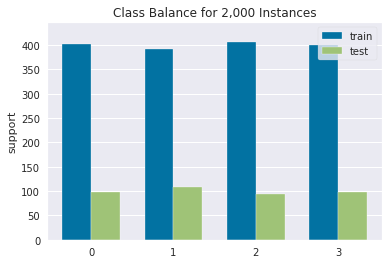

In [ ]:
# After splitting the data, lets check how the classes are split
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

#4.1 Naive Bayes Classifier - Base model

In [ ]:
nb_model = MultinomialNB(alpha=0.2)
nb = nb_model.fit(X_train,y_train)

In [ ]:
y_train_pred_nb = nb.predict(X_train)
y_pred_nb=nb.predict(X_test)

In [ ]:
print('First 10 actual vallues    :' , y_test[:10].values)
print('First 10 predicted vallues :' , y_pred_nb[:10])

First 10 actual vallues    : [0 2 1 2 3 1 3 3 2 1]
First 10 predicted vallues : [0 3 0 2 3 2 3 3 1 2]


In [ ]:
print('Report on Train Set')
print(classification_report(y_train, y_train_pred_nb))
print('Report on Test Set')
print(classification_report(y_test, y_pred_nb))

Report on Train Set
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       402
           1       0.42      0.38      0.39       391
           2       0.36      0.30      0.33       406
           3       0.53      0.66      0.59       401

    accuracy                           0.52      1600
   macro avg       0.51      0.52      0.51      1600
weighted avg       0.51      0.52      0.51      1600

Report on Test Set
              precision    recall  f1-score   support

           0       0.66      0.81      0.72        98
           1       0.45      0.38      0.41       109
           2       0.36      0.27      0.30        94
           3       0.58      0.70      0.64        99

    accuracy                           0.54       400
   macro avg       0.51      0.54      0.52       400
weighted avg       0.51      0.54      0.52       400



Also, as we have multi-class target variable, we will check the **weighted f1_score** which is found to be **0.51** and **0.52** for train & test set resp.

In [ ]:
# Storing the accuracy ,weighted f1 score and hamming loss for comparison
# Hamming loss is the fraction of targets that are misclassified.
nb_y_train_acc = accuracy_score(y_train, y_train_pred_nb)
nb_y_test_acc = accuracy_score(y_test, y_pred_nb)
nb_y_train_f1 = f1_score(y_train, y_train_pred_nb,average='weighted')
nb_y_test_f1 = f1_score(y_test, y_pred_nb,average='weighted')
nb_y_train_hl = hamming_loss(y_train, y_train_pred_nb)
nb_y_test_hl = hamming_loss(y_test, y_pred_nb)
print("Training accuracy", ":", nb_y_train_acc ,
      "Testing accuracy", ":", nb_y_test_acc)
print("Training weighted f1 score ", ":", nb_y_train_f1,
      "Testing weighted f1 score", ":",nb_y_test_f1)
print("Training hamming loss", ":", nb_y_train_hl ,
      "Testing hamming loss", ":",nb_y_test_hl)

Training accuracy : 0.518125 Testing accuracy : 0.535
Training weighted f1 score  : 0.5092788249550351 Testing weighted f1 score : 0.5177806163957752
Training hamming loss : 0.481875 Testing hamming loss : 0.465


In [ ]:
# Defining a function to display confusion matrix for train/test set
def CM(y_train_a,y_train_p,y_test_a,y_test_p):
  #geting the confusion matrix
  cm_train = confusion_matrix(y_train_a, y_train_p)
  cm_test =  confusion_matrix(y_test_a, y_test_p)
  #creating dataframe
  cm_train_df = pd.DataFrame(cm_train,
                     index = ['Low','Medium','High','Very High'], 
                     columns = ['Low','Medium','High','Very High'])
  cm_test_df = pd.DataFrame(cm_test,
                     index = ['Low','Medium','High','Very High'], 
                     columns = ['Low','Medium','High','Very High'])
  #plotting confusion matrix
  sns.set(font_scale=1.5)

  #Train set CM
  plt.figure(figsize=(12,8))
  sns.heatmap(cm_train_df, annot=True)
  plt.title('Confusion Matrix For Train set')
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()

  #Test set CM
  plt.figure(figsize=(12,8))
  sns.heatmap(cm_test_df, annot=True)
  plt.title('Confusion Matrix For Test set')
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()

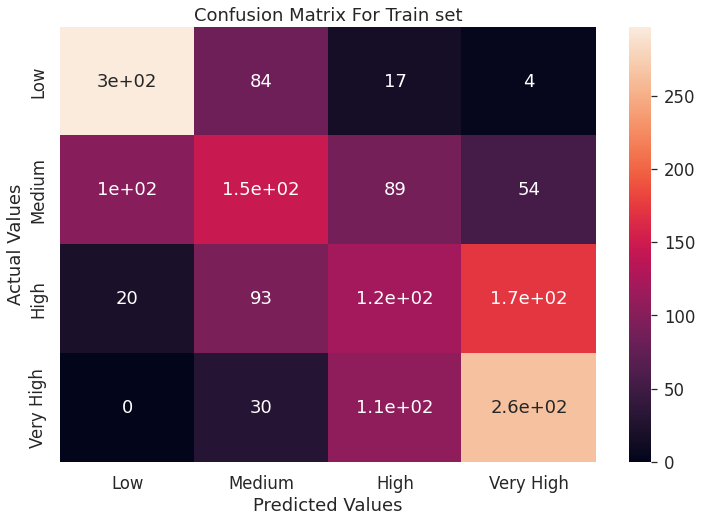

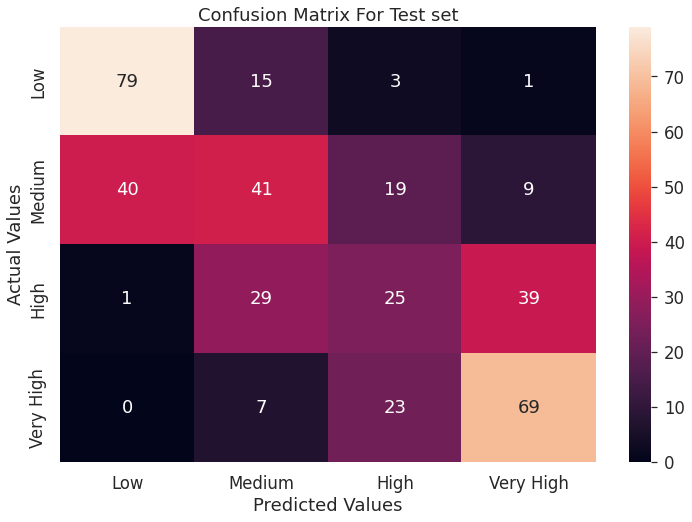

In [ ]:
# Confusion Mattrix
CM(y_train, y_train_pred_nb, y_test, y_pred_nb)

In [ ]:
# Creating a table to store first 10 predictions
predict_df = pd.DataFrame()
predict_df['Test'] = y_test[:10]
predict_df['Pred_NB'] = y_pred_nb[:10]
predict_df

Test  Pred_NB
278      0        0
492      2        3
1266     1        0
557      2        2
871      3        3
1622     1        2
891      3        3
1749     3        3
1867     2        1
1798     1        2

#4.2 Decision Tree Classifier

In [ ]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
d_tree = tree_model.fit(X_train_std, y_train)

In [ ]:
y_train_pred_tree = d_tree.predict(X_train_std)
y_pred_tree = d_tree.predict(X_test_std)

In [ ]:
print('First 10 actual vallues    :' , y_test[:10].values)
print('First 10 predicted vallues :' , y_pred_tree[:10])

First 10 actual vallues    : [0 2 1 2 3 1 3 3 2 1]
First 10 predicted vallues : [0 3 0 2 3 1 3 3 1 2]


In [ ]:
print('Report on Train Set')
print(classification_report(y_train, y_train_pred_tree))
print('Report on Test Set')
print(classification_report(y_test, y_pred_tree))

Report on Train Set
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       402
           1       0.72      0.71      0.72       391
           2       0.77      0.56      0.65       406
           3       0.82      0.95      0.88       401

    accuracy                           0.80      1600
   macro avg       0.79      0.80      0.79      1600
weighted avg       0.79      0.80      0.79      1600

Report on Test Set
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        98
           1       0.76      0.64      0.70       109
           2       0.81      0.53      0.64        94
           3       0.80      0.98      0.88        99

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.78      0.78      0.77       400



As we can see in the report we have **accuracy** of **0.80** & **0.78** on train & test set respectively 

Also,the **weighted f1_score**  is found to be **0.79** and **0.77** for train & test set resp. 

In [ ]:
# Storing the accuracy ,weighted f1 score and hamming loss for comparison
# Hamming loss is the fraction of targets that are misclassified.
tree_y_train_acc = accuracy_score(y_train, y_train_pred_tree)
tree_y_test_acc = accuracy_score(y_test, y_pred_tree)
tree_y_train_f1 = f1_score(y_train, y_train_pred_tree,average='weighted')
tree_y_test_f1 = f1_score(y_test, y_pred_tree,average='weighted')
tree_y_train_hl = hamming_loss(y_train, y_train_pred_tree)
tree_y_test_hl = hamming_loss(y_test, y_pred_tree)
print("Training accuracy", ":", tree_y_train_acc ,
      "Testing accuracy", ":",tree_y_test_acc)
print("Training weighted f1 score ", ":", tree_y_train_f1,
      "Testing weighted f1 score", ":",tree_y_test_f1)
print("Training hamming loss", ":", tree_y_train_hl ,
      "Testing hamming loss", ":",tree_y_test_hl)

Training accuracy : 0.7975 Testing accuracy : 0.78
Training weighted f1 score  : 0.7885441716305877 Testing weighted f1 score : 0.7673891487894999
Training hamming loss : 0.2025 Testing hamming loss : 0.22


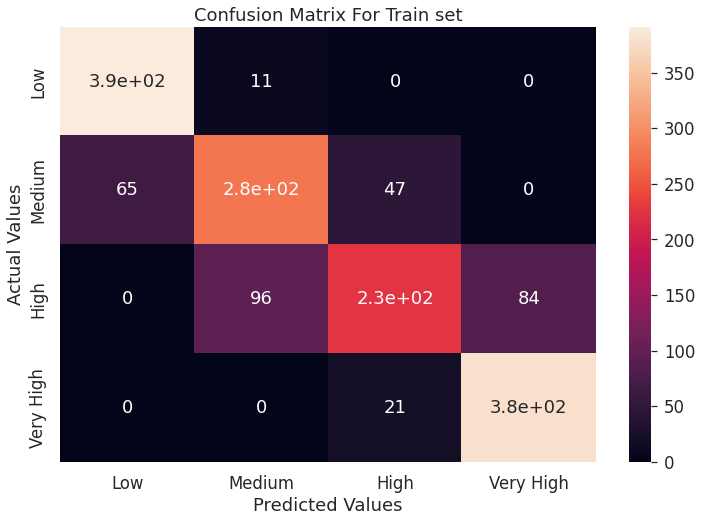

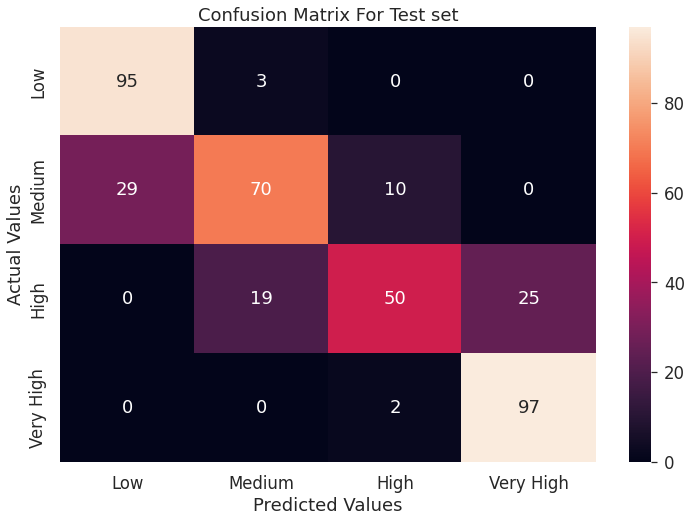

In [ ]:
# Confusion Matrix
CM(y_train,y_train_pred_tree,y_test,y_pred_tree)

We can say that the class medium and high price are not predicted well, while the class low and very high are predicted more correctly.

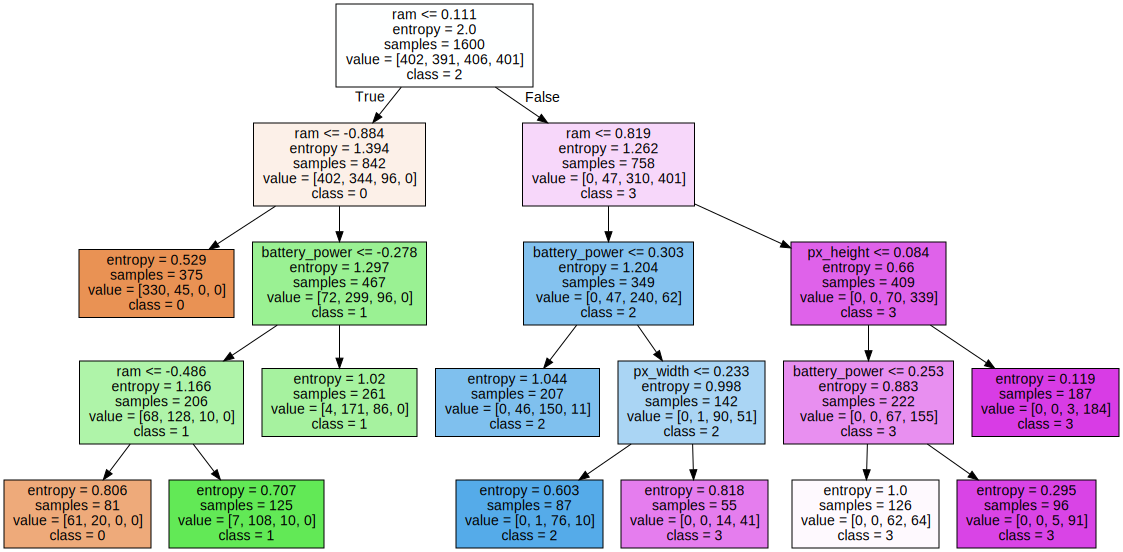

In [ ]:
# Visualising the decision tree
graph = Source(tree.export_graphviz(d_tree, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1','2','3'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
# Tuning hyperparameters for a better fit
# Cross-validation
d_tree_model_cv = DecisionTreeClassifier()
grid_values = {'min_samples_leaf':[3,4,5],'max_depth' : [3,4,5,6,7,8],'criterion':['entropy','gini'], 'max_leaf_nodes':[10,20,30,40,50]}
d_tree_cv = GridSearchCV(d_tree_model_cv, param_grid = grid_values, scoring = 'accuracy', cv=5,verbose=3)

# Fit the object to train dataset

d_tree_cv.fit(X_train_std, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3;, score=0.713 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3;, score=0.741 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=4;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=4;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_leaf=4;, score=0.775 total time=   0.0s
[CV 4/5] 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [3, 4, 5]},
             scoring='accuracy', verbose=3)

In [ ]:
print("The best fit gird values are found out to be :" ,d_tree_cv.best_params_)
print("\nUsing ",d_tree_cv.best_params_, ", accuracy is: ", d_tree_cv.best_score_)

The best fit gird values are found out to be : {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 50, 'min_samples_leaf': 5}

Using  {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 50, 'min_samples_leaf': 5} , accuracy is:  0.85375


In [ ]:
y_train_pred_bestfit_tree = d_tree_cv.predict(X_train_std)
y_pred_bestfit_tree = d_tree_cv.predict(X_test_std)

In [ ]:
print('First 10 actual vallues    :' , y_test[:10].values)
print('First 10 predicted vallues :' , y_pred_bestfit_tree[:10])

First 10 actual vallues    : [0 2 1 2 3 1 3 3 2 1]
First 10 predicted vallues : [0 2 1 2 3 1 3 3 2 2]


In [ ]:
print('Report on Train Set')
print(classification_report(y_train, y_train_pred_bestfit_tree))
print('Report on Test Set')
print(classification_report(y_test, y_pred_bestfit_tree))

Report on Train Set
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       402
           1       0.92      0.93      0.92       391
           2       0.89      0.90      0.89       406
           3       0.94      0.95      0.94       401

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600

Report on Test Set
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        98
           1       0.91      0.83      0.87       109
           2       0.86      0.83      0.84        94
           3       0.88      0.96      0.92        99

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [ ]:
# Storing accuracy , weighted f1_score and hamming_loss
bestfit_tree_y_train_acc = accuracy_score(y_train, y_train_pred_bestfit_tree)
bestfit_tree_y_test_acc = accuracy_score(y_test, y_pred_bestfit_tree)
bestfit_tree_y_train_f1 = f1_score(y_train, y_train_pred_bestfit_tree,average='weighted')
bestfit_tree_y_test_f1 = f1_score(y_test, y_pred_bestfit_tree,average='weighted')
bestfit_tree_y_train_hl = hamming_loss(y_train, y_train_pred_bestfit_tree)
bestfit_tree_y_test_hl = hamming_loss(y_test, y_pred_bestfit_tree)

print("Training accuracy", ":", bestfit_tree_y_train_acc ,
      "Testing accuracy", ":",bestfit_tree_y_test_acc)
print("Training weighted f1 score ", ":", bestfit_tree_y_train_f1,
      "Testing weighted f1 score", ":",bestfit_tree_y_test_f1)
print("Training hamming loss", ":", bestfit_tree_y_train_hl ,
      "Testing hamming loss", ":",bestfit_tree_y_test_hl)

Training accuracy : 0.93125 Testing accuracy : 0.8875
Training weighted f1 score  : 0.9314713025750223 Testing weighted f1 score : 0.8865533828979482
Training hamming loss : 0.06875 Testing hamming loss : 0.1125


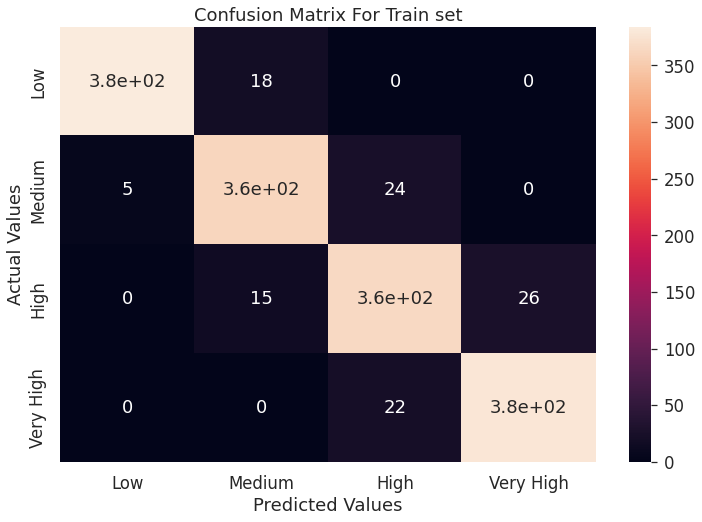

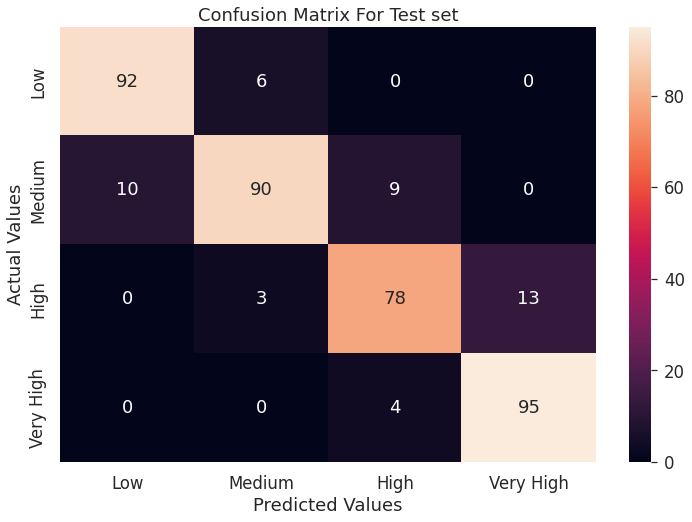

In [ ]:
# Confusion Mattrix for bestfit model
CM(y_train,y_train_pred_bestfit_tree,y_test,y_pred_bestfit_tree)

The results improved after hyperparameter tuning and we got accuracy , weighted f1 score and hamming loss of 88%,88% and 0.1125 on our test data

In [ ]:
# Updating the predict table with bestfit model
predict_df['Pred_tree'] = y_pred_bestfit_tree[:10]
predict_df

Test  Pred_NB  Pred_tree
278      0        0          0
492      2        3          2
1266     1        0          1
557      2        2          2
871      3        3          3
1622     1        2          1
891      3        3          3
1749     3        3          3
1867     2        1          2
1798     1        2          2

#4.3 Random Forest CLassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=0)
rf = rf_model.fit(X_train_std, y_train)

In [ ]:
y_train_pred_rf = rf.predict(X_train_std)
y_pred_rf = rf.predict(X_test_std)

In [ ]:
print('First 10 actual vallues    :' , y_test[:10].values)
print('First 10 predicted vallues :' , y_pred_rf[:10])

First 10 actual vallues    : [0 2 1 2 3 1 3 3 2 1]
First 10 predicted vallues : [0 2 1 2 3 1 3 3 1 2]


In [ ]:
print('Report on Train Set')
print(classification_report(y_train, y_train_pred_rf))
print('Report on Test Set')
print(classification_report(y_test, y_pred_rf))

Report on Train Set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       402
           1       0.97      0.97      0.97       391
           2       0.98      0.99      0.98       406
           3       1.00      1.00      1.00       401

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600

Report on Test Set
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        98
           1       0.87      0.81      0.84       109
           2       0.88      0.82      0.85        94
           3       0.93      0.97      0.95        99

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [ ]:
# Storing the accuracy ,weighted f1 score and hamming loss for comparison
rf_y_train_acc = accuracy_score(y_train, y_train_pred_rf)
rf_y_test_acc = accuracy_score(y_test, y_pred_rf)
rf_y_train_f1 = f1_score(y_train, y_train_pred_rf,average='weighted')
rf_y_test_f1 = f1_score(y_test, y_pred_rf,average='weighted')
rf_y_train_hl = hamming_loss(y_train, y_train_pred_rf)
rf_y_test_hl = hamming_loss(y_test, y_pred_rf)
print("Training accuracy", ":", rf_y_train_acc ,
      "Testing accuracy", ":",rf_y_test_acc)
print("Training weighted f1 score ", ":", rf_y_train_f1,
      "Testing weighted f1 score", ":",rf_y_test_f1)
print("Training hamming loss", ":", rf_y_train_hl ,
      "Testing hamming loss", ":",rf_y_test_hl)

Training accuracy : 0.9875 Testing accuracy : 0.89
Training weighted f1 score  : 0.9875114025413019 Testing weighted f1 score : 0.8884455047659893
Training hamming loss : 0.0125 Testing hamming loss : 0.11


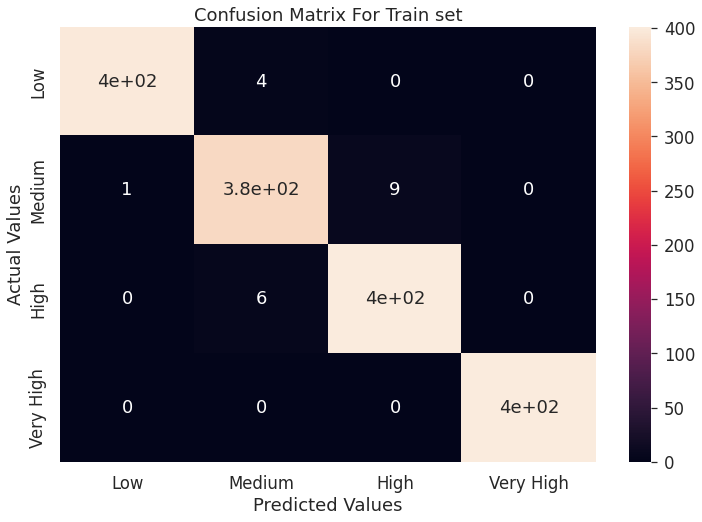

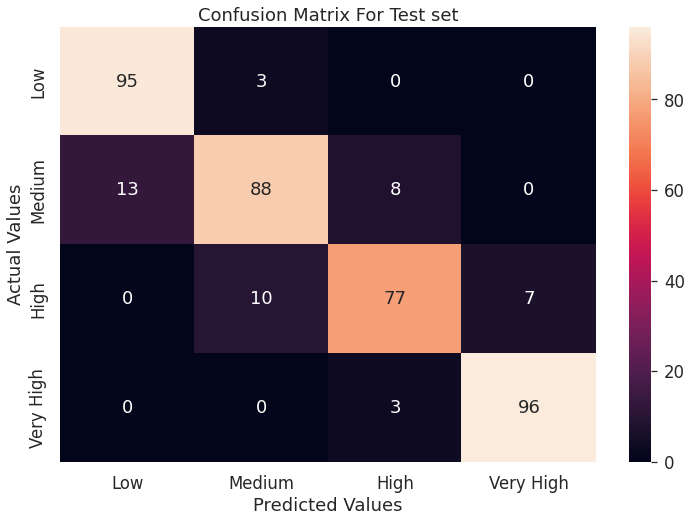

In [ ]:
# Confusion matrix
CM(y_train,y_train_pred_rf,y_test,y_pred_rf)

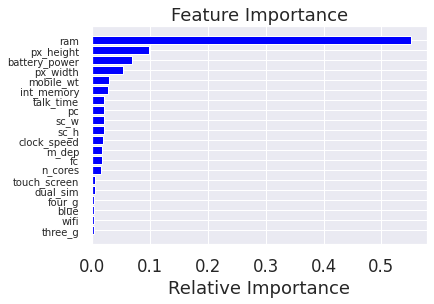

In [ ]:
# Imp features
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices],fontsize = 10)
plt.xlabel('Relative Importance')
plt.show()

MOst important feature is RAM as expected which is followed by pixel height and battery power

In [ ]:
# Tuning the rf
rf_model_cv = RandomForestClassifier()
grid_values = {'criterion':['gini','entropy'],'max_depth':[5,8,10],'n_estimators':[90,100,110],'min_samples_leaf':[3,4]}
rf_cv = GridSearchCV(rf_model_cv, param_grid = grid_values, scoring = 'accuracy', cv=5,verbose=3,n_jobs=-1)

# Fit the object to train dataset

rf_cv.fit(X_train_std, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 10], 'min_samples_leaf': [3, 4],
                         'n_estimators': [90, 100, 110]},
             scoring='accuracy', verbose=3)

In [ ]:
print("The best fit grid values are found out to be :" ,rf_cv.best_params_)
print("\nUsing ",rf_cv.best_params_, " accuracy is: ", rf_cv.best_score_)

The best fit grid values are found out to be : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 110}

Using  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 110}  accuracy is:  0.871875


In [ ]:
y_train_pred_bestfit_rf = rf_cv.predict(X_train_std)
y_pred_bestfit_rf = rf_cv.predict(X_test_std)

In [ ]:
print('First 10 actual vallues    :' , y_test[:10].values)
print('First 10 predicted vallues :' , y_pred_bestfit_rf[:10])

First 10 actual vallues    : [0 2 1 2 3 1 3 3 2 1]
First 10 predicted vallues : [0 2 0 2 3 1 3 3 1 1]


In [ ]:
print('Report on Train Set')
print(classification_report(y_train, y_train_pred_bestfit_rf))
print('Report on Test Set')
print(classification_report(y_test, y_pred_bestfit_rf))

Report on Train Set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       402
           1       0.97      0.98      0.98       391
           2       0.99      0.99      0.99       406
           3       1.00      1.00      1.00       401

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600

Report on Test Set
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        98
           1       0.88      0.83      0.85       109
           2       0.91      0.84      0.87        94
           3       0.94      0.98      0.96        99

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
# Storing the accuracy ,weighted f1 score and hamming loss for comparison
bestfit_rf_y_train_acc = accuracy_score(y_train, y_train_pred_bestfit_rf)
bestfit_rf_y_test_acc = accuracy_score(y_test, y_pred_bestfit_rf)
bestfit_rf_y_train_f1 = f1_score(y_train, y_train_pred_bestfit_rf,average='weighted')
bestfit_rf_y_test_f1 = f1_score(y_test, y_pred_bestfit_rf,average='weighted')
bestfit_rf_y_train_hl = hamming_loss(y_train, y_train_pred_bestfit_rf)
bestfit_rf_y_test_hl = hamming_loss(y_test, y_pred_bestfit_rf)
print("Training accuracy", ":", bestfit_rf_y_train_acc ,
      "Testing accuracy", ":",bestfit_rf_y_test_acc)
print("Training weighted f1 score ", ":", bestfit_rf_y_train_f1,
      "Testing weighted f1 score", ":",bestfit_rf_y_test_f1)
print("Training hamming loss", ":", bestfit_rf_y_train_hl ,
      "Testing hamming loss", ":",bestfit_rf_y_test_hl)

Training accuracy : 0.989375 Testing accuracy : 0.9025
Training weighted f1 score  : 0.989395137993982 Testing weighted f1 score : 0.9012714701116527
Training hamming loss : 0.010625 Testing hamming loss : 0.0975


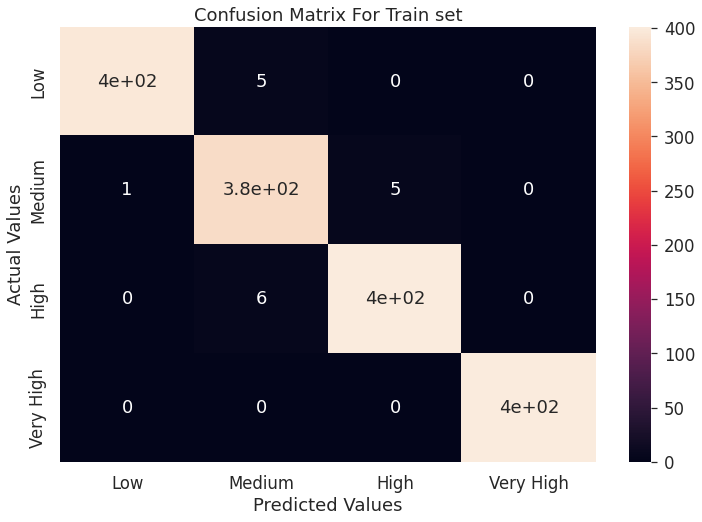

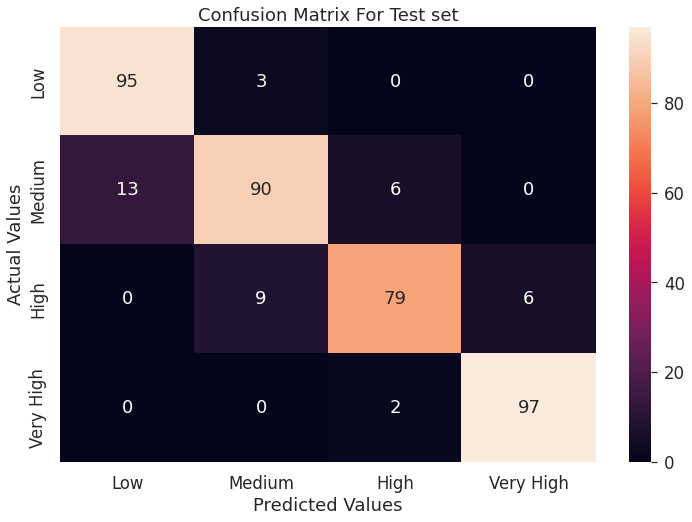

In [ ]:
# Confusion Matrix for bestfit RF
CM(y_train,y_train_pred_bestfit_rf,y_test,y_pred_bestfit_rf)

The results improved after hyperparameter tuning and we got accuracy , weighted f1 score and hamming loss of 92.6%,92.5% and 0.07 on our test data

In [ ]:
# Updating the predict table with bestfit model
predict_df['Pred_rf'] = y_pred_bestfit_rf[:10]
predict_df

Test  Pred_NB  Pred_tree  Pred_rf
278      0        0          0        0
492      2        3          2        2
1266     1        0          1        0
557      2        2          2        2
871      3        3          3        3
1622     1        2          1        1
891      3        3          3        3
1749     3        3          3        3
1867     2        1          2        1
1798     1        2          2        1

#4.4 Logistic Regression

In [ ]:
# Multi-nomial logistic regression
logr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_r = logr_model.fit(X_train_std,y_train)

In [ ]:
y_train_pred_logr = log_r.predict(X_train_std)
y_pred_logr = log_r.predict(X_test_std)

In [ ]:
print('First 10 actual vallues    :' , y_test[:10].values)
print('First 10 predicted vallues :' , y_pred_logr[:10])

First 10 actual vallues    : [0 2 1 2 3 1 3 3 2 1]
First 10 predicted vallues : [0 2 1 2 3 1 3 3 2 2]


In [ ]:
print('Report on Train Set')
print(classification_report(y_train, y_train_pred_logr))
print('Report on Test Set')
print(classification_report(y_test, y_pred_logr))

Report on Train Set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       402
           1       0.96      0.92      0.94       391
           2       0.92      0.94      0.93       406
           3       0.96      0.96      0.96       401

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

Report on Test Set
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        98
           1       0.97      0.90      0.93       109
           2       0.94      0.94      0.94        94
           3       0.96      0.98      0.97        99

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [ ]:
# Storing the accuracy ,weighted f1 score and hamming loss for comparison
# Hamming loss is the fraction of targets that are misclassified.
logr_y_train_acc = accuracy_score(y_train, y_train_pred_logr)
logr_y_test_acc = accuracy_score(y_test, y_pred_logr)
logr_y_train_f1 = f1_score(y_train, y_train_pred_logr,average='weighted')
logr_y_test_f1 = f1_score(y_test, y_pred_logr,average='weighted')
logr_y_train_hl = hamming_loss(y_train, y_train_pred_logr)
logr_y_test_hl = hamming_loss(y_test, y_pred_logr)
print("Training accuracy", ":", logr_y_train_acc ,
      "Testing accuracy", ":",logr_y_test_acc)
print("Training weighted f1 score ", ":", logr_y_train_f1,
      "Testing weighted f1 score", ":",logr_y_test_f1)
print("Training hamming loss", ":", logr_y_train_hl ,
      "Testing hamming loss", ":",logr_y_test_hl)

Training accuracy : 0.950625 Testing accuracy : 0.95
Training weighted f1 score  : 0.95056230378735 Testing weighted f1 score : 0.9497053630363037
Training hamming loss : 0.049375 Testing hamming loss : 0.05


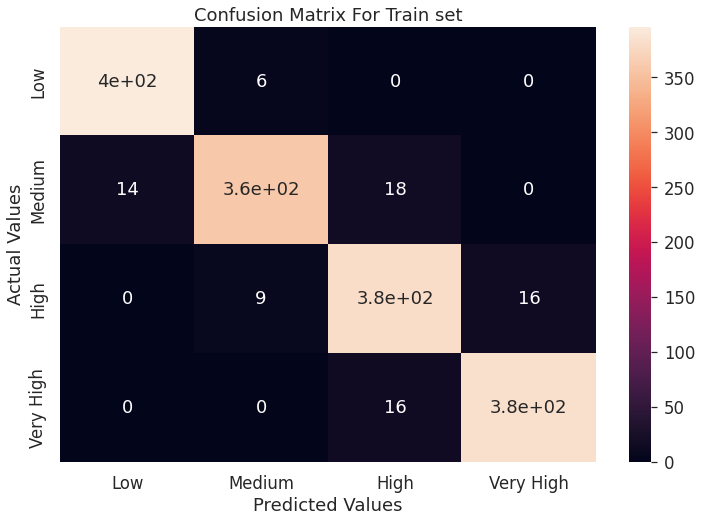

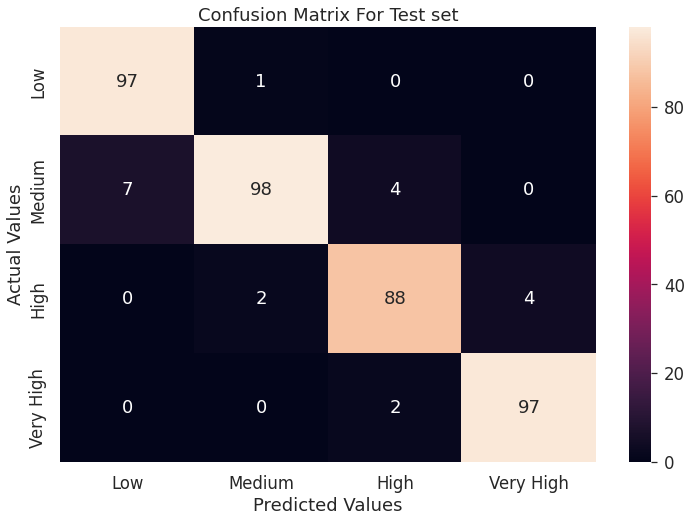

In [ ]:
# Confusion matrix
CM(y_train,y_train_pred_logr,y_test,y_pred_logr)

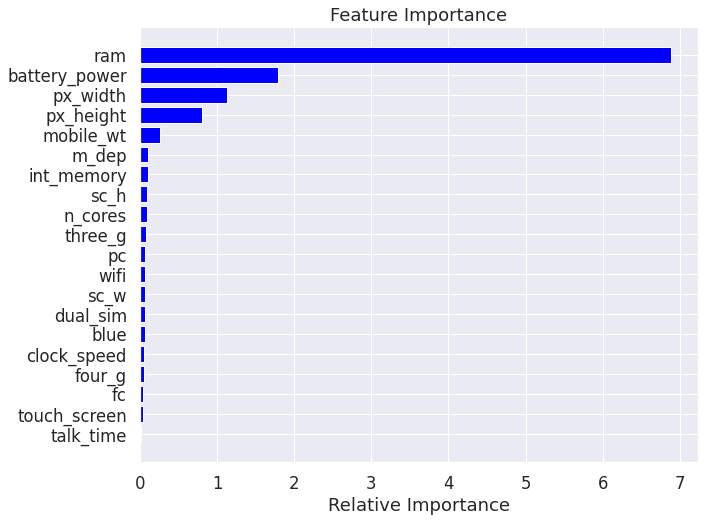

In [ ]:
# Extracting Important Features
feature_coef = np.abs(log_r.coef_)
feature_coef=feature_coef.mean(axis=0)
feat_imp_dict = {feature_coef[i]: X_train.columns[i] for i in range(len(feature_coef))}
feature_coef.sort()
top_imp_features = [feat_imp_dict[i] for i in feature_coef[::-1]]
plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.barh( top_imp_features[::-1] ,feature_coef , color='blue', align='center')
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Cross-validation and tuning
# We know that for logistic regression,different solver supports different regularisation 
# Also we can select one-vs-rest (OvR) scheme if the 'multi_class' option is set to 'ovr'
# and uses the cross-entropy loss by setting multi_class to auto,multinomial
# Lets try each combination in our gridsearch
# solver sag and saga converges fast as compared to other solvers when data is standardised 

logr_model_cv = LogisticRegression(n_jobs=-1)
grid_values = {'penalty':['l1','l2','elasticnet','none'],'C':[0.7,0.8,0.9],'solver':['liblinear','lbfgs','sag','saga','newton-cg'],'multi_class':['auto','multinomial','ovr'],'max_iter':[70,80,100]}
logr_cv = GridSearchCV(logr_model_cv, param_grid = grid_values, scoring = 'accuracy', cv=5,verbose=3)

# Fit the object to train dataset

logr_cv.fit(X_train_std, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5] END C=0.7, max_iter=70, multi_class=auto, penalty=l1, solver=liblinear;, score=0.847 total time=   0.1s
[CV 2/5] END C=0.7, max_iter=70, multi_class=auto, penalty=l1, solver=liblinear;, score=0.803 total time=   0.0s
[CV 3/5] END C=0.7, max_iter=70, multi_class=auto, penalty=l1, solver=liblinear;, score=0.825 total time=   0.0s
[CV 4/5] END C=0.7, max_iter=70, multi_class=auto, penalty=l1, solver=liblinear;, score=0.828 total time=   0.0s
[CV 5/5] END C=0.7, max_iter=70, multi_class=auto, penalty=l1, solver=liblinear;, score=0.831 total time=   0.1s
[CV 1/5] END C=0.7, max_iter=70, multi_class=auto, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.7, max_iter=70, multi_class=auto, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.7, max_iter=70, multi_class=auto, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.7, max_iter=70, multi_class=auto,

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': [0.7, 0.8, 0.9], 'max_iter': [70, 80, 100],
                         'multi_class': ['auto', 'multinomial', 'ovr'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             scoring='accuracy', verbose=3)

In [ ]:
print("The best fit gird values are found out to be :" ,logr_cv.best_params_)
print("\nUsing ",logr_cv.best_params_, ", accuracy is: ", logr_cv.best_score_)

The best fit gird values are found out to be : {'C': 0.7, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}

Using  {'C': 0.7, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'} , accuracy is:  0.929375


In [ ]:
y_train_pred_bestfit_logr = logr_cv.predict(X_train_std)
y_pred_bestfit_logr = logr_cv.predict(X_test_std)

In [ ]:
print('First 10 actual vallues    :' , y_test[:10].values)
print('First 10 predicted vallues :' , y_pred_bestfit_logr[:10])

First 10 actual vallues    : [0 2 1 2 3 1 3 3 2 1]
First 10 predicted vallues : [0 2 1 2 3 1 3 3 2 2]


In [ ]:
print('Report on Train Set')
print(classification_report(y_train, y_train_pred_bestfit_logr))
print('Report on Test Set')
print(classification_report(y_test, y_pred_bestfit_logr))

Report on Train Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       402
           1       0.96      0.93      0.95       391
           2       0.93      0.94      0.94       406
           3       0.96      0.98      0.97       401

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600

Report on Test Set
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        98
           1       0.97      0.92      0.94       109
           2       0.95      0.94      0.94        94
           3       0.96      0.99      0.98        99

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
# Storing accuracy , weighted f1_score and hamming_loss
bestfit_logr_y_train_acc = accuracy_score(y_train, y_train_pred_bestfit_logr)
bestfit_logr_y_test_acc = accuracy_score(y_test, y_pred_bestfit_logr)
bestfit_logr_y_train_f1 = f1_score(y_train, y_train_pred_bestfit_logr,average='weighted')
bestfit_logr_y_test_f1 = f1_score(y_test, y_pred_bestfit_logr,average='weighted')
bestfit_logr_y_train_hl = hamming_loss(y_train, y_train_pred_bestfit_logr)
bestfit_logr_y_test_hl = hamming_loss(y_test, y_pred_bestfit_logr)

print("Training accuracy", ":", bestfit_logr_y_train_acc ,
      "Testing accuracy", ":",bestfit_logr_y_test_acc)
print("Training weighted f1 score ", ":", bestfit_logr_y_train_f1,
      "Testing weighted f1 score", ":",bestfit_logr_y_test_f1)
print("Training hamming loss", ":", bestfit_logr_y_train_hl ,
      "Testing hamming loss", ":",bestfit_logr_y_test_hl)

Training accuracy : 0.95875 Testing accuracy : 0.9575
Training weighted f1 score  : 0.9586916975657336 Testing weighted f1 score : 0.9572452258684382
Training hamming loss : 0.04125 Testing hamming loss : 0.0425


The results improved after hyperparameter tuning and we got accuracy , weighted f1 score and hamming loss of 95.6%,95.5% and 0.044 on our test data

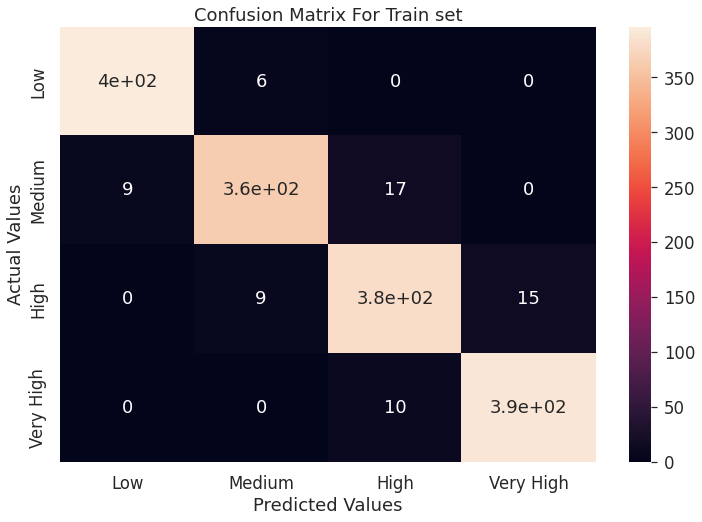

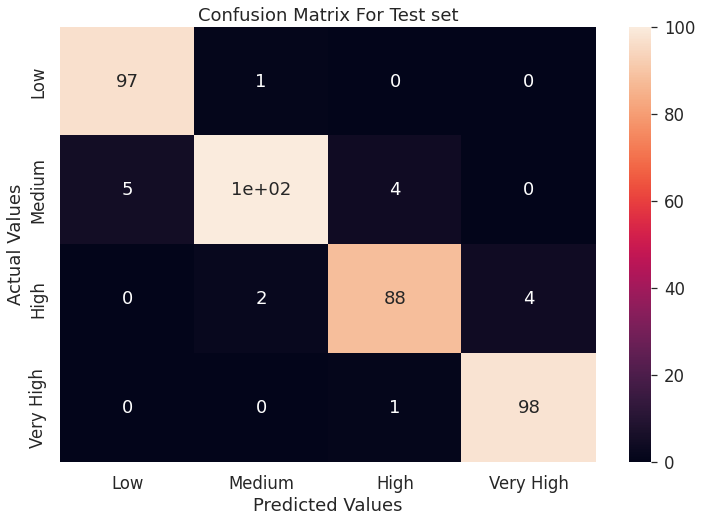

In [ ]:
# Confusion Mattrix for bestfit model
CM(y_train,y_train_pred_bestfit_logr,y_test,y_pred_bestfit_logr)

In [ ]:
# Updating the predict table with bestfit model
predict_df['Pred_logr'] = y_pred_bestfit_logr[:10]
predict_df

Test  Pred_NB  Pred_tree  Pred_rf  Pred_logr
278      0        0          0        0          0
492      2        3          2        2          2
1266     1        0          1        0          1
557      2        2          2        2          2
871      3        3          3        3          3
1622     1        2          1        1          1
891      3        3          3        3          3
1749     3        3          3        3          3
1867     2        1          2        1          2
1798     1        2          2        1          2

#4.5 Support Vector Machines

In [ ]:
svm_model=SVC(random_state=1)
svm= svm_model.fit(X_train_std,y_train)

In [ ]:
y_train_pred_svm = svm.predict(X_train_std)
y_pred_svm = svm.predict(X_test_std)

In [ ]:
print('First 10 actual vallues    :' , y_test[:10].values)
print('First 10 predicted vallues :' , y_pred_svm[:10])

First 10 actual vallues    : [0 2 1 2 3 1 3 3 2 1]
First 10 predicted vallues : [0 2 1 2 2 1 3 3 2 1]


In [ ]:
print('Report on Train Set')
print(classification_report(y_train, y_train_pred_svm))
print('Report on Test Set')
print(classification_report(y_test, y_pred_svm))

Report on Train Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       402
           1       0.98      0.97      0.98       391
           2       0.98      0.97      0.98       406
           3       0.98      0.99      0.99       401

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

Report on Test Set
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        98
           1       0.85      0.85      0.85       109
           2       0.85      0.82      0.83        94
           3       0.95      0.95      0.95        99

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [ ]:
# Storing the accuracy ,weighted f1 score and hamming loss for comparison
svm_y_train_acc = accuracy_score(y_train, y_train_pred_svm)
svm_y_test_acc = accuracy_score(y_test, y_pred_svm)
svm_y_train_f1 = f1_score(y_train, y_train_pred_svm,average='weighted')
svm_y_test_f1 = f1_score(y_test, y_pred_svm,average='weighted')
svm_y_train_hl = hamming_loss(y_train, y_train_pred_svm)
svm_y_test_hl = hamming_loss(y_test, y_pred_svm)
print("Training accuracy", ":", svm_y_train_acc ,
      "Testing accuracy", ":",svm_y_test_acc)
print("Training weighted f1 score ", ":", svm_y_train_f1,
      "Testing weighted f1 score", ":",svm_y_test_f1)
print("Training hamming loss", ":", svm_y_train_hl ,
      "Testing hamming loss", ":",svm_y_test_hl)

Training accuracy : 0.981875 Testing accuracy : 0.8925
Training weighted f1 score  : 0.9818387428111717 Testing weighted f1 score : 0.8922114929375203
Training hamming loss : 0.018125 Testing hamming loss : 0.1075


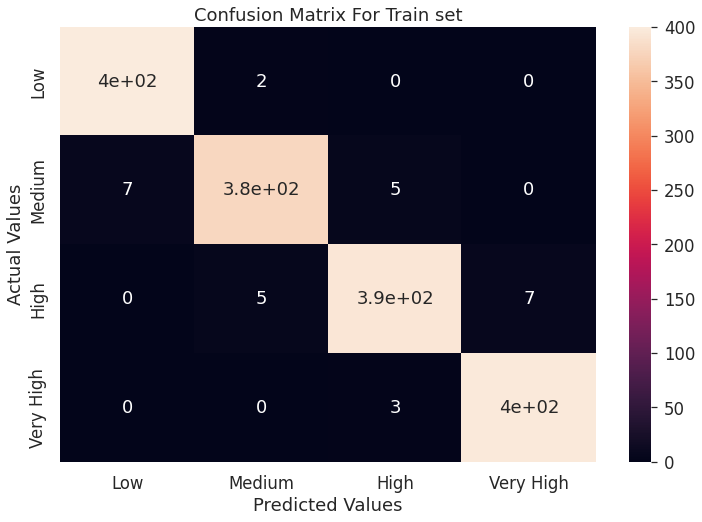

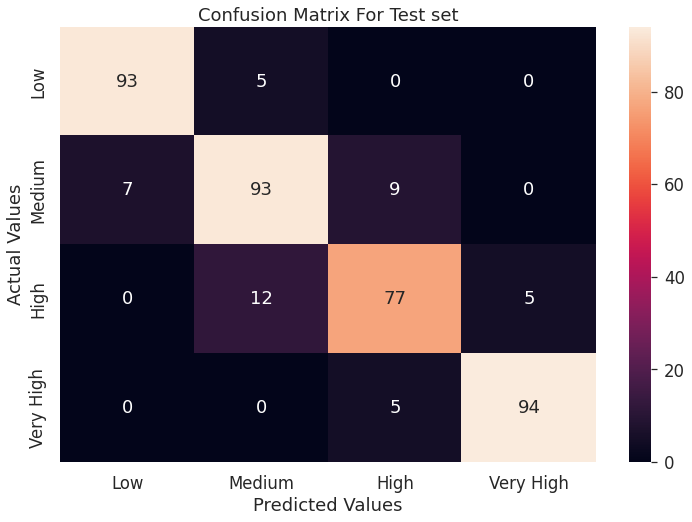

In [ ]:
# Confusion matrix
CM(y_train,y_train_pred_svm,y_test,y_pred_svm)

In [ ]:
# Tuning the SVM Classifier
# We will try both ovo:one vs one and ovr: one vs rest classifier decision function
svm_model_cv = SVC()
grid_values = {'C': [10,12,14,15],  
              'gamma': ['auto','scale',1,2,3,5], 
              'kernel': ['rbf','linear','poly'],
              'decision_function_shape':["ovo","ovr"]}
svm_cv = GridSearchCV(svm_model_cv, param_grid = grid_values, scoring = 'accuracy', cv=5,verbose=3,n_jobs=-1)

# Fit the object to train dataset

svm_cv.fit(X_train_std, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [10, 12, 14, 15],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['auto', 'scale', 1, 2, 3, 5],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=3)

In [ ]:
print("The best fit grid values are found out to be :" ,svm_cv.best_params_)
print("\nUsing ",svm_cv.best_params_, " accuracy is: ", svm_cv.best_score_)

The best fit grid values are found out to be : {'C': 14, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}

Using  {'C': 14, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}  accuracy is:  0.9306249999999998


In [ ]:
y_train_pred_bestfit_svm = svm_cv.predict(X_train_std)
y_pred_bestfit_svm = svm_cv.predict(X_test_std)

In [ ]:
print('First 10 actual vallues    :' , y_test[:10].values)
print('First 10 predicted vallues :' , y_pred_bestfit_svm[:10])

First 10 actual vallues    : [0 2 1 2 3 1 3 3 2 1]
First 10 predicted vallues : [0 2 1 2 3 1 3 3 2 2]


In [ ]:
print('Report on Train Set')
print(classification_report(y_train, y_train_pred_bestfit_svm))
print('Report on Test Set')
print(classification_report(y_test, y_pred_bestfit_svm))

Report on Train Set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       402
           1       0.97      0.94      0.95       391
           2       0.94      0.94      0.94       406
           3       0.96      0.98      0.97       401

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600

Report on Test Set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        98
           1       0.98      0.91      0.94       109
           2       0.93      0.97      0.95        94
           3       0.97      0.99      0.98        99

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
# Storing the accuracy ,weighted f1 score and hamming loss for comparison
bestfit_svm_y_train_acc = accuracy_score(y_train, y_train_pred_bestfit_svm)
bestfit_svm_y_test_acc = accuracy_score(y_test, y_pred_bestfit_svm)
bestfit_svm_y_train_f1 = f1_score(y_train, y_train_pred_bestfit_svm,average='weighted')
bestfit_svm_y_test_f1 = f1_score(y_test, y_pred_bestfit_svm,average='weighted')
bestfit_svm_y_train_hl = hamming_loss(y_train, y_train_pred_bestfit_svm)
bestfit_svm_y_test_hl = hamming_loss(y_test, y_pred_bestfit_svm)
print("Training accuracy", ":", bestfit_svm_y_train_acc ,
      "Testing accuracy", ":",bestfit_svm_y_test_acc)
print("Training weighted f1 score ", ":", bestfit_svm_y_train_f1,
      "Testing weighted f1 score", ":",bestfit_svm_y_test_f1)
print("Training hamming loss", ":", bestfit_svm_y_train_hl ,
      "Testing hamming loss", ":",bestfit_svm_y_test_hl)

Training accuracy : 0.96125 Testing accuracy : 0.96
Training weighted f1 score  : 0.9611697065448456 Testing weighted f1 score : 0.9598147456709956
Training hamming loss : 0.03875 Testing hamming loss : 0.04


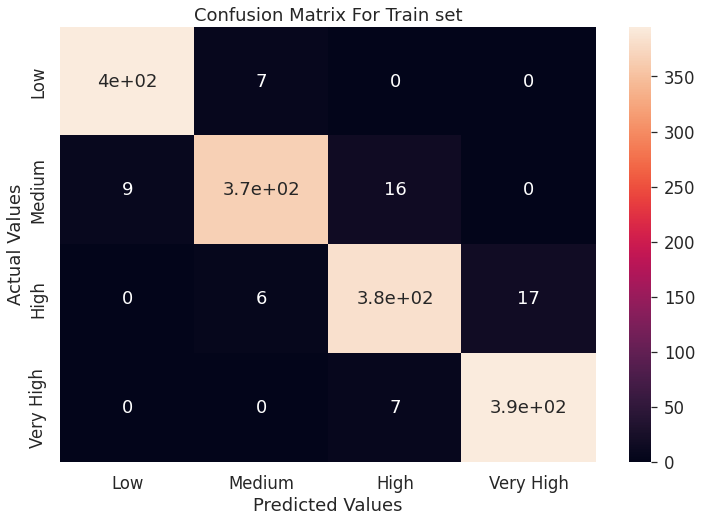

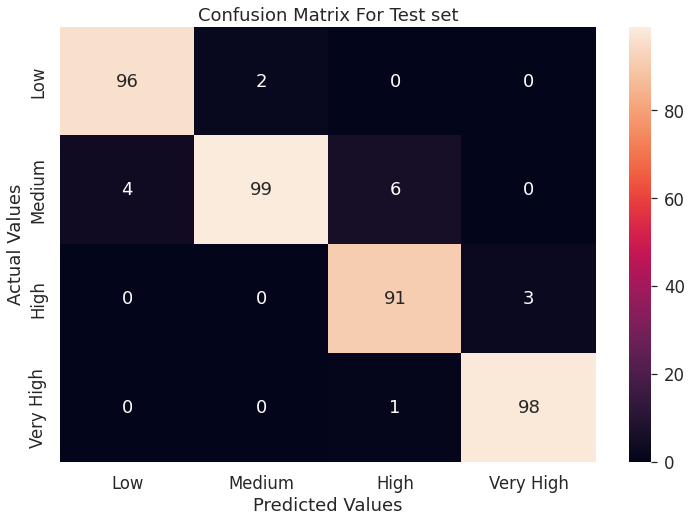

In [ ]:
# Confusion Matrix
CM(y_train,y_train_pred_bestfit_svm,y_test,y_pred_bestfit_svm)

In [ ]:
# Updating the predict table
predict_df['Pred_svm'] = y_pred_bestfit_svm[:10]
predict_df

Test  Pred_NB  Pred_tree  Pred_rf  Pred_logr  Pred_svm
278      0        0          0        0          0         0
492      2        3          2        2          2         2
1266     1        0          1        0          1         1
557      2        2          2        2          2         2
871      3        3          3        3          3         3
1622     1        2          1        1          1         1
891      3        3          3        3          3         3
1749     3        3          3        3          3         3
1867     2        1          2        1          2         2
1798     1        2          2        1          2         2

The results improved after hyperparameter tuning and we got accuracy , weighted f1 score and hamming loss of 96%,95.9% and 0.04 on our test data

#5 Model selection

In [ ]:
results_df = pd.DataFrame()
results_df['Weighted_f1_score-Train'] = [nb_y_train_f1, bestfit_tree_y_train_f1, bestfit_rf_y_train_f1, bestfit_logr_y_train_f1, bestfit_svm_y_train_f1]
results_df['hamming_loss-Train'] = [nb_y_train_hl, bestfit_tree_y_train_hl, bestfit_rf_y_train_hl, bestfit_logr_y_train_hl, bestfit_svm_y_train_hl]
results_df['Weighted_f1_score-Test'] = [nb_y_test_f1, bestfit_tree_y_test_f1, bestfit_rf_y_test_f1, bestfit_logr_y_test_f1, bestfit_svm_y_test_f1]
results_df['hamming_loss-Test'] = [nb_y_test_hl, bestfit_tree_y_test_hl, bestfit_rf_y_test_hl, bestfit_logr_y_test_hl, bestfit_svm_y_test_hl]
results_df.index = ['Naive_Bayes','Decision_Tree','Random_Forest','Logistic_Reg','SVM']
results_df

Weighted_f1_score-Train  hamming_loss-Train  \
Naive_Bayes                   0.509279            0.481875   
Decision_Tree                 0.931471            0.068750   
Random_Forest                 0.989395            0.010625   
Logistic_Reg                  0.958692            0.041250   
SVM                           0.961170            0.038750   

               Weighted_f1_score-Test  hamming_loss-Test  
Naive_Bayes                  0.517781             0.4650  
Decision_Tree                0.886553             0.1125  
Random_Forest                0.901271             0.0975  
Logistic_Reg                 0.957245             0.0425  
SVM                          0.959815             0.0400

In [ ]:
predict_df

Test  Pred_NB  Pred_tree  Pred_rf  Pred_logr  Pred_svm
278      0        0          0        0          0         0
492      2        3          2        2          2         2
1266     1        0          1        0          1         1
557      2        2          2        2          2         2
871      3        3          3        3          3         3
1622     1        2          1        1          1         1
891      3        3          3        3          3         3
1749     3        3          3        3          3         3
1867     2        1          2        1          2         2
1798     1        2          2        1          2         2

We decided to select Logistic Regression over SVM based on following points:
*   As we saw while training SVM, linear kernel fitted our data the best,so we dont need non-linear kernel for our data.
*   In case of linear kernel SVM, it performs similar to LR, but for non-linear relation SVM beats LR.
*   Here, LR is prefered as it can output probabilities instead of hard labels and if needed we can fine tune our performance by plotting ROC curve and figuring out the right thredhold.
*   Logistic Regression is like linear regression with activation function added. This makes it more easier to interpret as compared to SVM which finds decision boundaries to separate the classes.





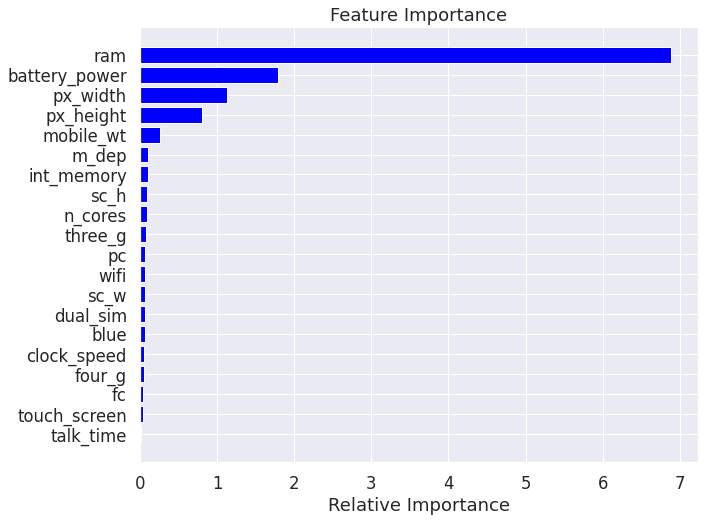

In [ ]:
# Important features based on Logistic Regression 
plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.barh( top_imp_features[::-1] ,feature_coef , color='blue', align='center')
plt.xlabel('Relative Importance')
plt.show()

# Summary

We had data for 2000 mobile phones grouped into 4 categories based on Price range.
* We first cleaned data by removing zeroes values and abnormally small values(Pixel Height). 
* EDA summarized to following takeaway points:
   1. Almost half of the mobiles in our dataset have Bluetooth,
      dual sim, 4G, touch screen, Wi-Fi. 
   2. Majority of mobiles(~75%) have 3G connectivity. 
   3. Mobile weight is up to 200g.
   4. RAM of 2GB can be a border line to separate low and very 
      high price tags directly irrespective of other mobile specifications. 
   5. Mobiles in higher price range have high pixel 
      resolution.   
   6. Even with low ram , it's possible to have up to 3 GHz 
      clock speed. 
   7. We can have any number of cores from 1 to 8 for any 
range of RAM.
   8. This dataset seems older as the specifications of mobiles are not from recent technologies like max 2000mah battery, 4gb ram,etc 

* Our base model , Naïve Bayes Classifier gave around 50% accuracy. 
* Decision Trees and Random forest over fitted our data and we are not able to reach good accuracy levels for Test sets. 
* Decision Trees and Random forest worked quite well on Class0 & 3 (low & very high price) 
* Logistic Regression and SVM(with linear kernel) worked best on our classification task and delivered around 96% accuracy on both Train/Test sets. 
* We ended up selecting Logistic Regression over SVM as our best model. 
* Most important features affecting mobile price are found to be RAM, battery power, pixel resolution (height & width) and mobile weight.